<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas</a></span></li><li><span><a href="#Libs-and-import-data" data-toc-modified-id="Libs-and-import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libs and import data</a></span></li><li><span><a href="#Data-Wrangle" data-toc-modified-id="Data-Wrangle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Wrangle</a></span><ul class="toc-item"><li><span><a href="#Split-data-train,-test" data-toc-modified-id="Split-data-train,-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split data train, test</a></span></li><li><span><a href="#Fill-NaN-values" data-toc-modified-id="Fill-NaN-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fill NaN values</a></span></li><li><span><a href="#Additional-cleanup" data-toc-modified-id="Additional-cleanup-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Additional cleanup</a></span></li><li><span><a href="#Split-features-(meteorological-inputs)-and-label-(PM2.5)" data-toc-modified-id="Split-features-(meteorological-inputs)-and-label-(PM2.5)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Split features (meteorological inputs) and label (PM<sub>2.5</sub>)</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#evaluate-model-performance" data-toc-modified-id="evaluate-model-performance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>evaluate model performance</a></span></li></ul></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DecisionTree</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#save-model" data-toc-modified-id="save-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>save model</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Analyze-model" data-toc-modified-id="Analyze-model-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Analyze model</a></span></li><li><span><a href="#Scipy-interval-95%" data-toc-modified-id="Scipy-interval-95%-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Scipy interval 95%</a></span></li><li><span><a href="#Ensemble-Methods" data-toc-modified-id="Ensemble-Methods-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Ensemble Methods</a></span></li></ul></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-7"><span class="toc-item-num">6&nbsp;&nbsp;</span>RMSE</a></span></li></ul></div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Ideas
- Load data from local disk
- Analyse and build a prediction model using Linear Regresssion, XgboostRegressor,RandomForest,Bagging Regressor and ensemble learning techniques
- Measured the accurate (or the error) from those technique


# Libs and import data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# let load our data
df=pd.read_excel(r'/content/drive/MyDrive/2024/Dustpredict/Dust-predict/Reliable.xlsx')
df.head()

,date,time,timestamp,pm2.5,pm10,tsp,temp,hum,press,wspd,wdir,rain
0,31-01-2024,00:00:27,1706630427,37,44,74,26.4,80,1.012,0.7,114,0.0
1,31-01-2024,00:01:27,1706630487,41,51,85,26.4,81,1.012,1.4,93,0.0
2,31-01-2024,00:02:28,1706630548,38,46,77,26.4,80,1.012,0.8,99,0.0
3,31-01-2024,00:03:27,1706630607,41,52,87,26.5,80,1.012,1.3,70,0.0
4,31-01-2024,00:04:28,1706630668,42,53,89,26.5,81,1.012,0.9,74,0.0


# Exploratory Data Analysis

## Data cleaning/preprocessing
- Droping tsp as its not going to be used in  training our model
- Create the datetime feature from the date and time features
- convert dataframes data to float

In [5]:
df=df.rename(columns={'pm2.5':'pm25'})
df=df.drop(['tsp',],axis=1)
df['date']=df['date'].astype(str)
df['time']=df['time'].astype(str)





In [6]:

df['datetime'] = pd.to_datetime(df['date']+' '+df['time'],format='mixed')
# df['datetime'] = pd.to_datetime(df['date']+' '+df['time'])
df=df.drop(['date','time','timestamp',],axis=1)
df.set_index(['datetime'],inplace=True)

df=df.astype(float)

In [7]:
df.head()

,pm25,pm10,temp,hum,press,wspd,wdir,rain
datetime,,,,,,,,
2024-01-31 00:00:27,37.0,44.0,26.4,80.0,1.012,0.7,114.0,0.0
2024-01-31 00:01:27,41.0,51.0,26.4,81.0,1.012,1.4,93.0,0.0
2024-01-31 00:02:28,38.0,46.0,26.4,80.0,1.012,0.8,99.0,0.0
2024-01-31 00:03:27,41.0,52.0,26.5,80.0,1.012,1.3,70.0,0.0
2024-01-31 00:04:28,42.0,53.0,26.5,81.0,1.012,0.9,74.0,0.0


## Summary Statistics

In [8]:
df.describe()

,pm25,pm10,temp,hum,press,wspd,wdir,rain
count,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000
mean,45.868132,54.201347,29.673092,74.072949,1.008789,0.793938,142.554051,25.523938
std,86.857424,87.398896,3.281601,13.328480,0.002052,0.590337,97.282469,22.347884
min,0.000000,0.000000,23.800000,37.000000,1.003000,0.000000,0.000000,0.000000
25%,37.000000,43.000000,26.900000,65.000000,1.007000,0.300000,76.000000,17.400000
50%,41.000000,50.000000,28.700000,77.000000,1.009000,0.700000,107.000000,20.600000
75%,47.000000,58.000000,32.600000,85.000000,1.010000,1.100000,200.000000,26.600000
max,3435.000000,3435.000000,38.000000,94.000000,1.014000,5.600000,359.000000,74.200000


>**Conclusion:**
>-From the summary satistics we can notice outliers in pm25 and pm10 base on it mininmum,maximum,and mean value we will visulaise this outliers in the data visualisation section

## Data Visualisation

In [9]:
data=df.copy(deep=True)

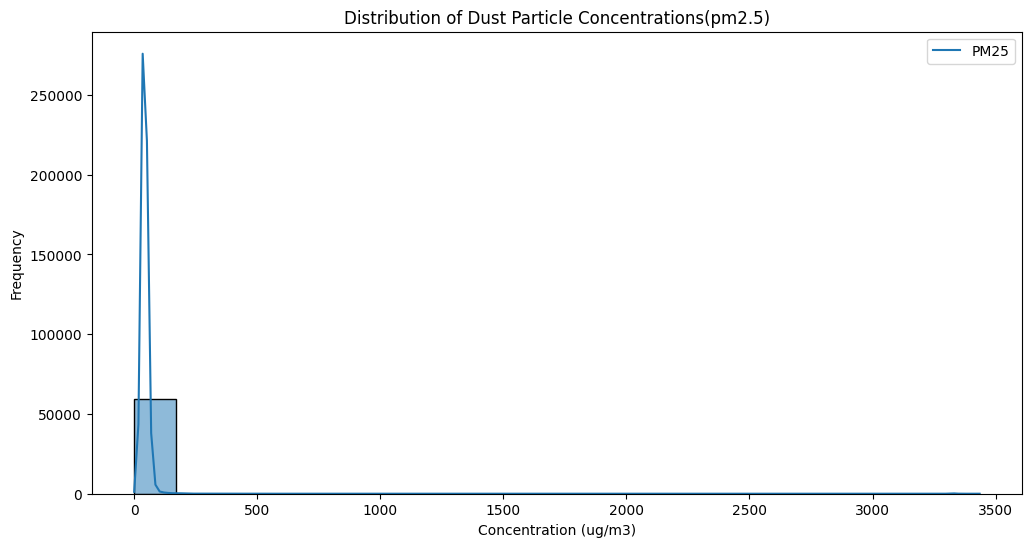

In [10]:
# Distribution of dust particle concentrations
plt.figure(figsize=(12, 6))
sns.histplot(data=data[['pm25' ]], bins=20, kde=True)
plt.title('Distribution of Dust Particle Concentrations(pm2.5)')
plt.xlabel('Concentration (ug/m3)')
plt.ylabel('Frequency')
plt.legend(['PM25',])
plt.show()

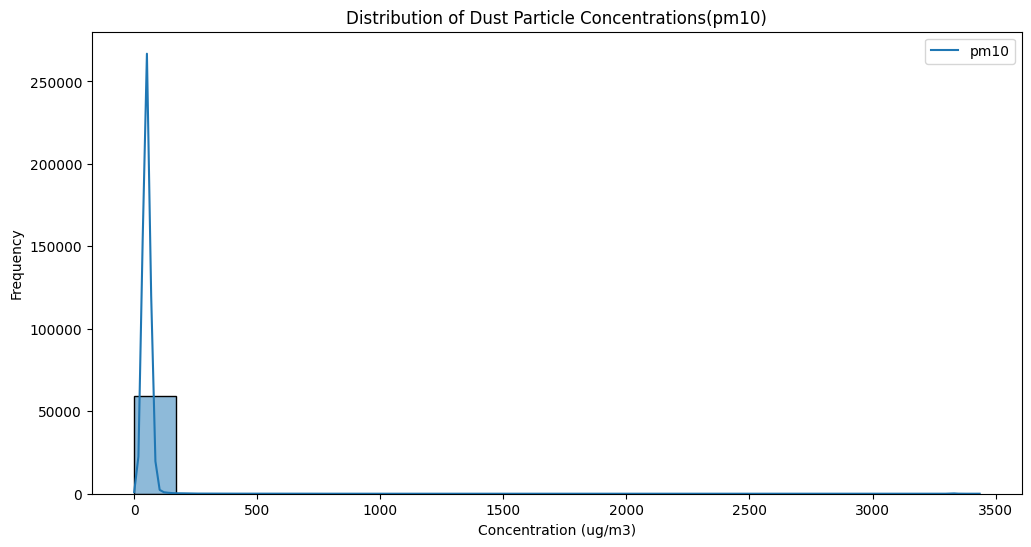

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data[['pm10' ]], bins=20, kde=True)
plt.title('Distribution of Dust Particle Concentrations(pm10)')
plt.xlabel('Concentration (ug/m3)')
plt.ylabel('Frequency')
plt.legend(['pm10',])
plt.show()

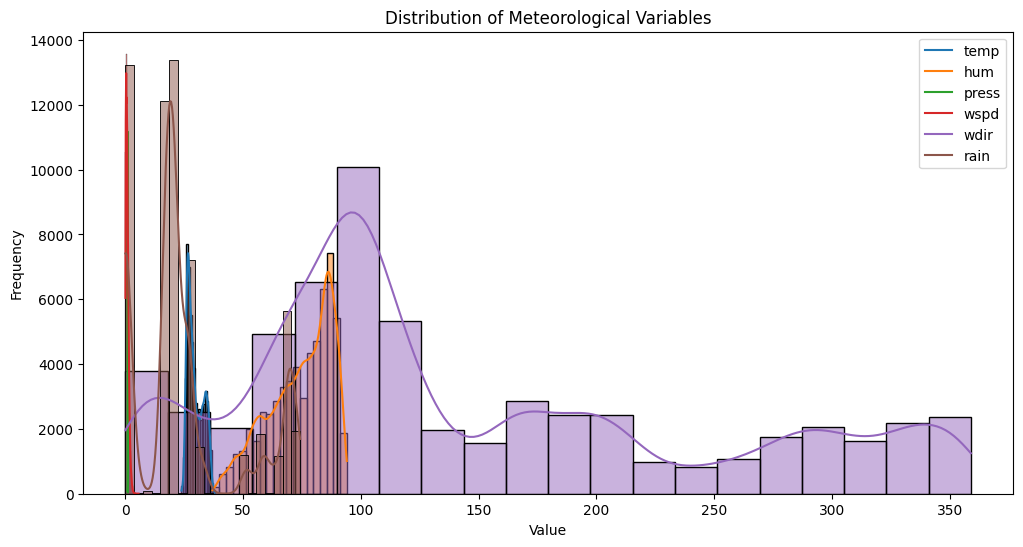

In [12]:
# Distribution of meteorological variables
meteorological_vars = ['temp', 'hum', 'press', 'wspd', 'wdir', 'rain']
plt.figure(figsize=(12, 6))
for var in meteorological_vars:
    sns.histplot(data[var], bins=20, kde=True, alpha=0.5)
plt.title('Distribution of Meteorological Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(meteorological_vars)
plt.show()

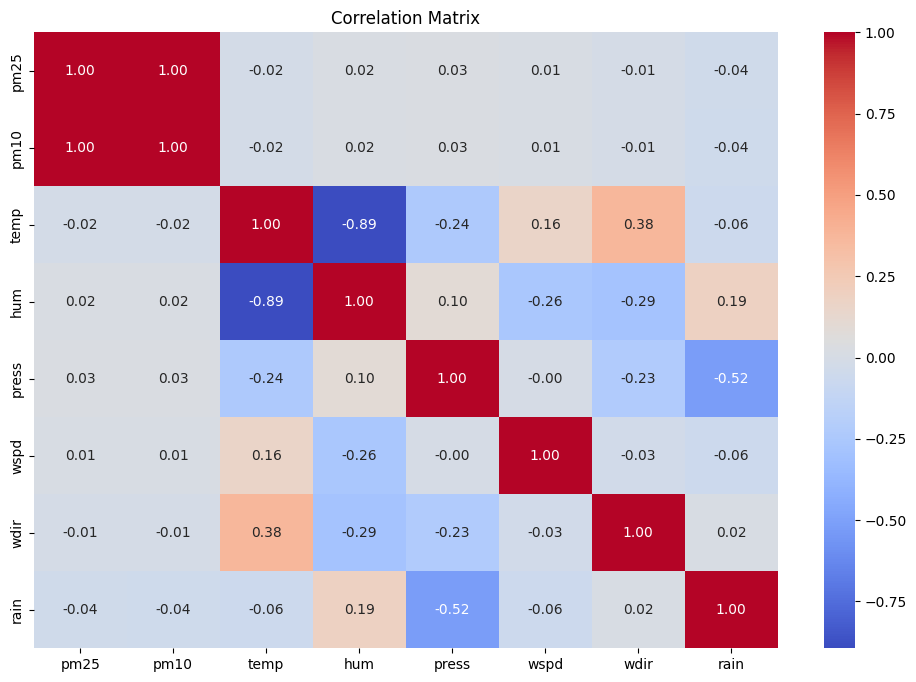

In [13]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

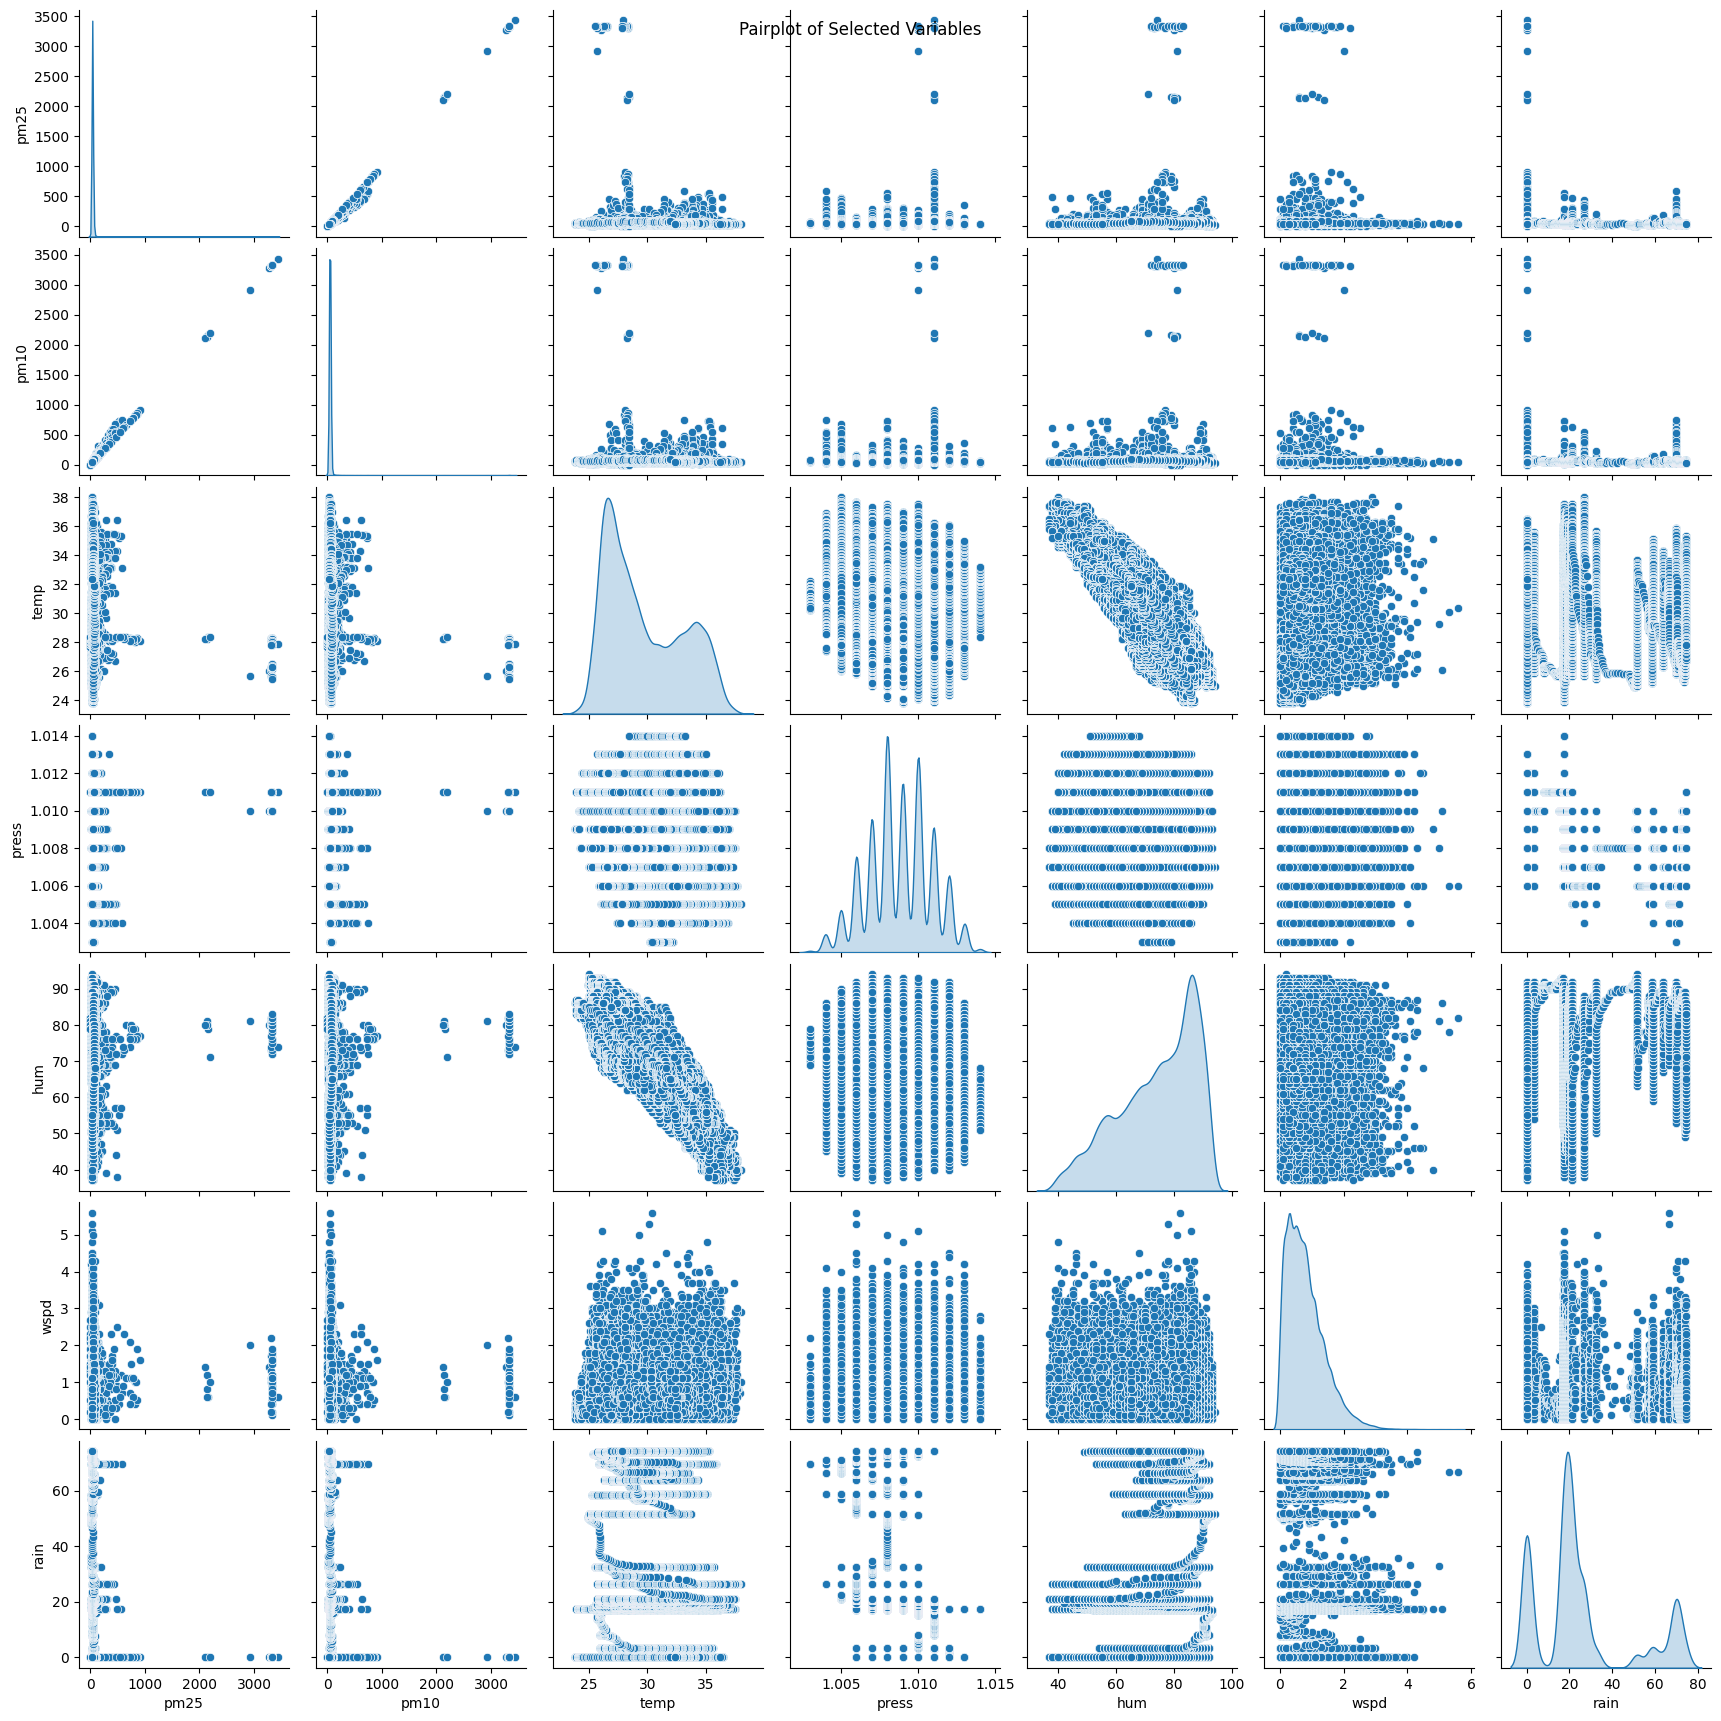

In [14]:

# Pairplot for selected variables
selected_variables = ['pm25','pm10', 'temp','press' ,'hum', 'wspd', 'rain']
sns.pairplot(data[selected_variables], diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

**Conclusion:**
>
>- From The correlation Heatmap and pairplot it can be seen that there is a very strong positive correlation between PM2.5 and PM10, indicating that as the concentration of PM2.5 increases, PM10 concentration also increases
>- Also, there is a strong negative correlation between temperature and humidity.

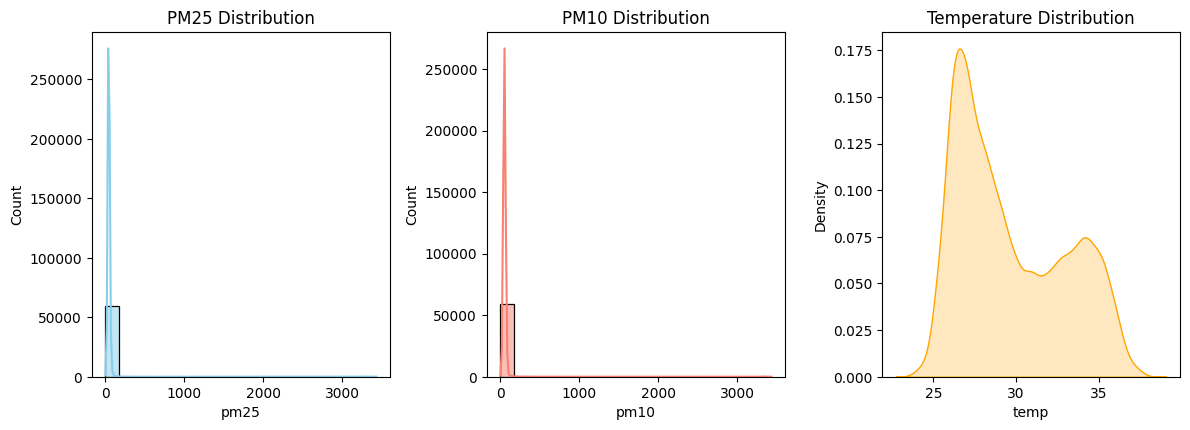

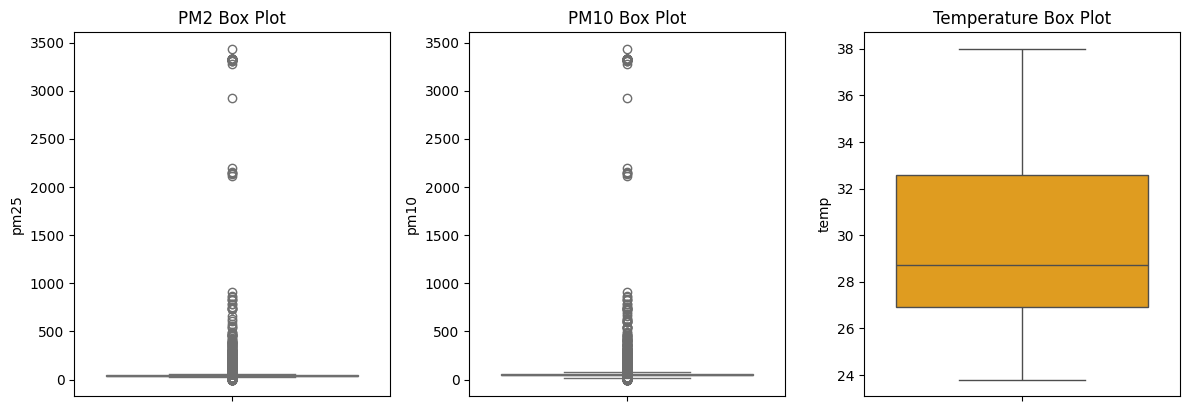

In [15]:
plt.figure(figsize=(12, 8))

# Histograms
plt.subplot(2, 3, 1)
sns.histplot(df['pm25'], kde=True, bins=20, color='skyblue')
plt.title('PM25 Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['pm10'], kde=True, bins=20, color='salmon')
plt.title('PM10 Distribution')


# KDE plots
plt.subplot(2, 3, 3)
sns.kdeplot(df['temp'], shade=True, color='orange')
plt.title('Temperature Distribution')

plt.tight_layout()
plt.show()





# Box plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['pm25'], color='skyblue')
plt.title('PM2 Box Plot')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['pm10'], color='salmon')
plt.title('PM10 Box Plot')


plt.subplot(2, 3, 3)
sns.boxplot(y=df['temp'], color='orange')
plt.title('Temperature Box Plot')





plt.tight_layout()
plt.show()

>**Conclusion:** Based on the data visualisation it can be seen that we have outliers in pm25 and pm 10 which might not be good for a regression model

## Handling Outliers


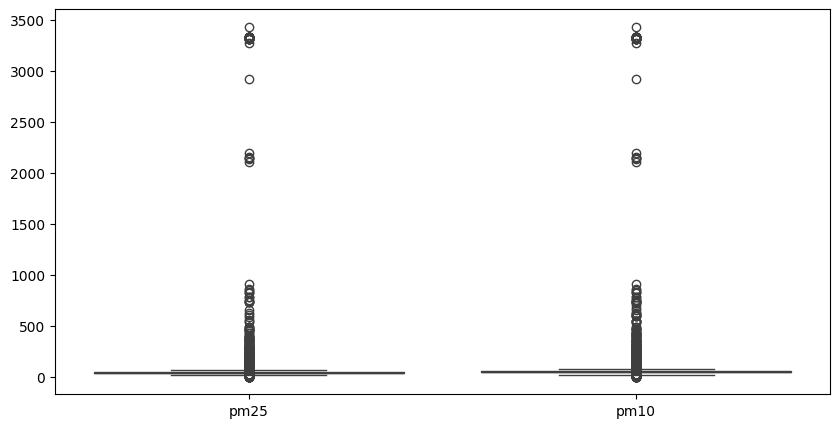

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['pm25', 'pm10']])
plt.show()


In [17]:
Q1_pm25 = df['pm25'].quantile(0.25)
Q3_pm25 = df['pm25'].quantile(0.75)
IQR_pm25 = Q3_pm25 - Q1_pm25

Q1_pm10 = df['pm10'].quantile(0.25)
Q3_pm10 = df['pm10'].quantile(0.75)
IQR_pm10 = Q3_pm10 - Q1_pm10

outliers_pm25 = df[(df['pm25'] < (Q1_pm25 - 1.5 * IQR_pm25)) | (df['pm25'] > (Q3_pm25 + 1.5 * IQR_pm25))]
outliers_pm10 = df[(df['pm10'] < (Q1_pm10 - 1.5 * IQR_pm10)) | (df['pm10'] > (Q3_pm10 + 1.5 * IQR_pm10))]


In [18]:
# df_clean = df[~((df['pm25'] < (Q1_pm25 - 1.5 * IQR_pm25)) | (df['pm25'] > (Q3_pm25 + 1.5 * IQR_pm25)) |
#                 (df['pm10'] < (Q1_pm10 - 1.5 * IQR_pm10)) | (df['pm10'] > (Q3_pm10 + 1.5 * IQR_pm10)))]


In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 5))
# sns.boxplot(data=df_clean[['pm25', 'pm10']])
# plt.show()


>**Conclusion:** Outliers has been removed and thus we can proceed to build  regression models  with the available data

In [20]:
df.describe()

,pm25,pm10,temp,hum,press,wspd,wdir,rain
count,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000
mean,45.868132,54.201347,29.673092,74.072949,1.008789,0.793938,142.554051,25.523938
std,86.857424,87.398896,3.281601,13.328480,0.002052,0.590337,97.282469,22.347884
min,0.000000,0.000000,23.800000,37.000000,1.003000,0.000000,0.000000,0.000000
25%,37.000000,43.000000,26.900000,65.000000,1.007000,0.300000,76.000000,17.400000
50%,41.000000,50.000000,28.700000,77.000000,1.009000,0.700000,107.000000,20.600000
75%,47.000000,58.000000,32.600000,85.000000,1.010000,1.100000,200.000000,26.600000
max,3435.000000,3435.000000,38.000000,94.000000,1.014000,5.600000,359.000000,74.200000


***Normalise PM25 into a normal ditibution by taking it log function***

Skewness: 35.048697
Kurtosis: 1292.572557


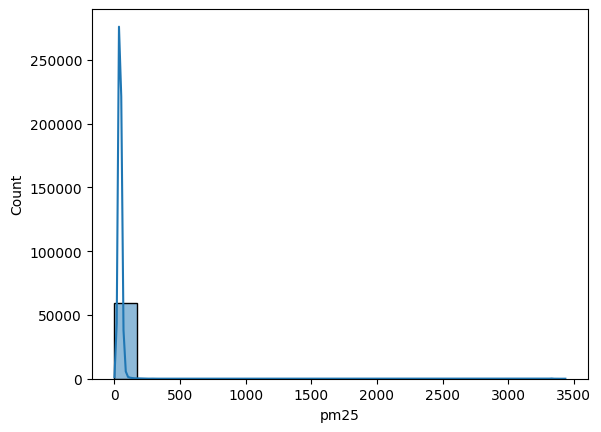

In [21]:
sns.histplot(data['pm25'],kde=True,bins=20)

print("Skewness: %f" % data['pm25'].skew())
print("Kurtosis: %f" % data['pm25'].kurt())

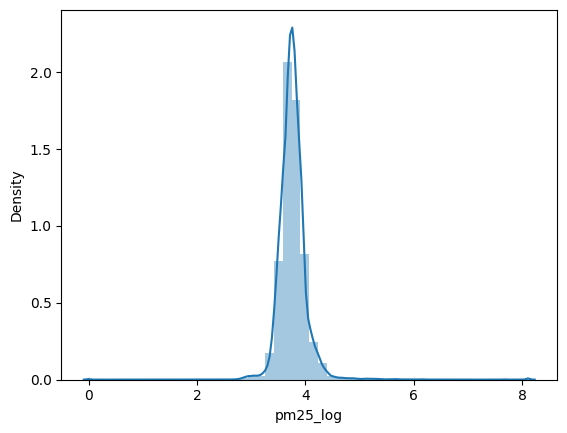

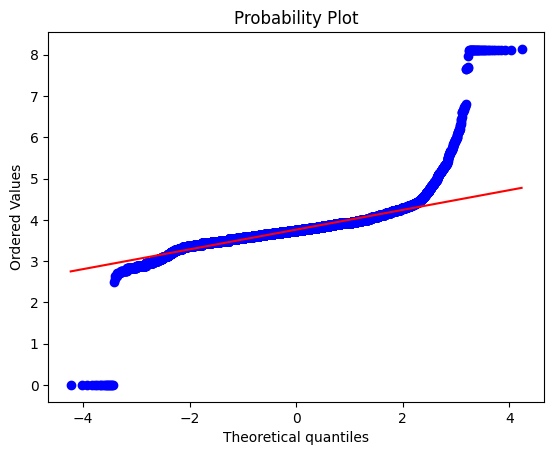

In [22]:
from scipy import stats
#applying log transformation
# df['pm25_log'] = np.log(df['pm25'])
df['pm25_log'] = np.log1p(df['pm25'])  # log1p is log(1 + x), avoids issues with zero

#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(df['pm25_log'],);
fig = plt.figure()
res = stats.probplot(df['pm25_log'], plot=plt)

In [23]:
df.describe()

,pm25,pm10,temp,hum,press,wspd,wdir,rain,pm25_log
count,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000,59370.000000
mean,45.868132,54.201347,29.673092,74.072949,1.008789,0.793938,142.554051,25.523938,3.763003
std,86.857424,87.398896,3.281601,13.328480,0.002052,0.590337,97.282469,22.347884,0.275643
min,0.000000,0.000000,23.800000,37.000000,1.003000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,43.000000,26.900000,65.000000,1.007000,0.300000,76.000000,17.400000,3.637586
50%,41.000000,50.000000,28.700000,77.000000,1.009000,0.700000,107.000000,20.600000,3.737670
75%,47.000000,58.000000,32.600000,85.000000,1.010000,1.100000,200.000000,26.600000,3.871201
max,3435.000000,3435.000000,38.000000,94.000000,1.014000,5.600000,359.000000,74.200000,8.142063


## Feature selection

In [24]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [25]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """

    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))

    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [26]:
def prepareData(series, test_size,lags=None,timeseries='timeseries',target_encoding=False):


    # copy of the initial dataset
    data = pd.DataFrame(series.copy(deep=True))
    # data.columns = ["y"]



    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["minutes"]=data.index.minute

    # # Example: Rolling mean for PM2.5
    data['pm25_rolling_mean'] = data['pm25_log'].rolling(window=30).mean()



    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        # data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "pm25").get, data.hour))
        data["min_average"] = list(map(code_mean(data[:test_index], 'minutes', "pm25").get, data.hour))

        # frop encoded variables
        data.drop(["hour"], axis=1, inplace=True)
        data.drop(["minutes"], axis=1, inplace=True)


      # train-test split
    y = data.dropna().pm25_log
    X = data.dropna().drop(['pm25','pm25_log'], axis=1)
    if timeseries=='timeseries':
      X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)
    elif timeseries=='ml':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=2020)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)




    return X_train, X_test, y_train, y_test

In [27]:
def plotModelResults(model, X_train, X_test, y_train, y_test, plot_intervals=False, plot_anomalies=False):
    """
    Plots modelled vs fact values, prediction intervals, and anomalies
    """

    prediction = model.predict(X_test)
    print(y_test.shape)
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)

    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train,
                                    cv=tscv,
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()

        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)

        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)

        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")

    error = mean_absolute_percentage_error(prediction, y_test)
    if np.isinf(error):  # If error is infinite, switch to mean squared error
        error = mean_squared_error(prediction, y_test)
        plt.title("Mean squared error: {:.2f}".format(error))
    else:
        plt.title("Mean absolute percentage error: {:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)


def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    plt.title('Regression Feature Importances ')

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plotRegression(y_test, y_pred):
    """
    Plots a regression plot of actual vs predicted values with a regression line.
    """

    # Revert the log transformation
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.3)

    # Plot regression line
    regression_line = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, np.polyval(regression_line, y_test), color='green', linewidth=2.0, label='Regression Line')

    # Adjust x and y axis limits to avoid cutting off data
    plt.xlim([min(y_test), max(y_test) * 1.05])
    plt.ylim([min(y_pred), max(y_pred) * 1.05])

    plt.title('Regression Plot: Actual vs Predicted PM2.5 Concentration')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()




In [29]:
def plot_residual(y_test,y_pred):
    # Calculate residuals
    residuals = y_test - y_pred

    # Plot residuals against predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.2)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residual Plot f')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotRegression_result(y_test, y_pred):

    """
    Plots a regression plot of actual vs predicted values with additional visualizations.
    """

    plt.figure(figsize=(18, 10))

    # Scatter Plot
    plt.subplot(2, 3, 1)
    plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.5)
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')
    plt.legend()

    # Plot regression line
    regression_line = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, np.polyval(regression_line, y_test), color='green', linewidth=2.0, label='Regression Line')
    plt.legend()

    # Residual Plot
    plt.subplot(2, 3, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, color='red', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted PM2.5 Concentration')
    plt.ylabel('Residuals')

    # Distribution Plot of Residuals
    plt.subplot(2, 3, 3)
    sns.histplot(residuals, kde=True, color='orange')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Coefficient of Determination (R^2)
    r_squared = np.corrcoef(y_test, y_pred)[0, 1] ** 2
    plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    plt.text(0.05, 0.85, f'MAE = {mae:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.75, f'MSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.65, f'RMSE = {rmse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Line of Perfect Prediction
    plt.plot(y_test, y_test, color='gray', linestyle='--', label='Perfect Prediction')
    plt.legend()

    # Confidence Intervals for the Regression Line
    plt.subplot(2, 3, 4)
    sns.regplot(x=y_test, y=y_pred, ci=95, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'green', 'linewidth': 2})
    plt.title('Regression Plot with Confidence Intervals')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')

    # Scatter Density Plot
    plt.subplot(2, 3, 5)
    sns.kdeplot(x=y_test, y=y_pred, cmap='Blues', shade=True, shade_lowest=False)
    plt.title('Scatter Density Plot')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')

    plt.tight_layout()
    plt.show()


In [31]:
def mean_absolute_percentage_error(y_true, y_pred, threshold=1e-5):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Replace zero values in y_true with threshold
    y_true[np.abs(y_true) < threshold] = threshold
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse=np.sqrt(mse)
    return mae, mse, r2,rmse

In [33]:
# the results by train set and test set are rather different, to see it
def plot_prediction(label=None, prediction=None,title=None, limit=200):
    plt.figure(figsize=(14,6))
    plt.plot(label.to_list(),label='Actual')
    plt.plot(prediction, 'ro',label='Predicted')
    plt.xlim(0, limit)
    plt.title(f'{title} Actual vs Predicted')
    plt.legend()
    return None

## Split features (meteorological inputs with PM<sub>10</sub>) and label (PM<sub>2.5</sub>)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:

X_train, X_test, y_train, y_test = prepareData(df.copy(), test_size=0.2,target_encoding=False,timeseries='ml')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_scaled = scaler.fit_transform(X_train)

In [37]:
len(X_train_scaled), len(y_test)

(47472, 11869)

# Linear Regression

In [38]:
# Linear regression is the simplest form of data learning, let try this first
from sklearn.linear_model import LinearRegression

In [39]:
# make an instant of the class
lin_reg = LinearRegression()

In [40]:
# and training the model using the _train dataset
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
# let see the output of the mode
lin_reg.coef_

array([ 0.1168304 ,  0.02773875,  0.02968241,  0.00251021, -0.00194124,
        0.00226406, -0.00441551, -0.00046901, -0.00266691,  0.1719637 ])

## evaluate model performance

In [43]:
# predict based on the training set
y_train_prd = lin_reg.predict(X_train_scaled)

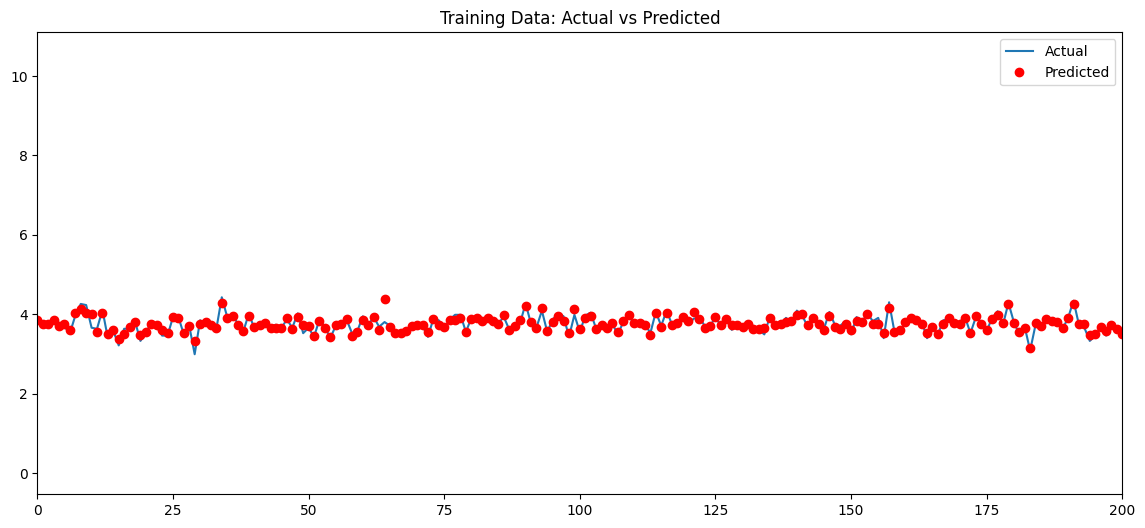

In [44]:
plot_prediction(y_train,y_train_prd,title='Training Data:')

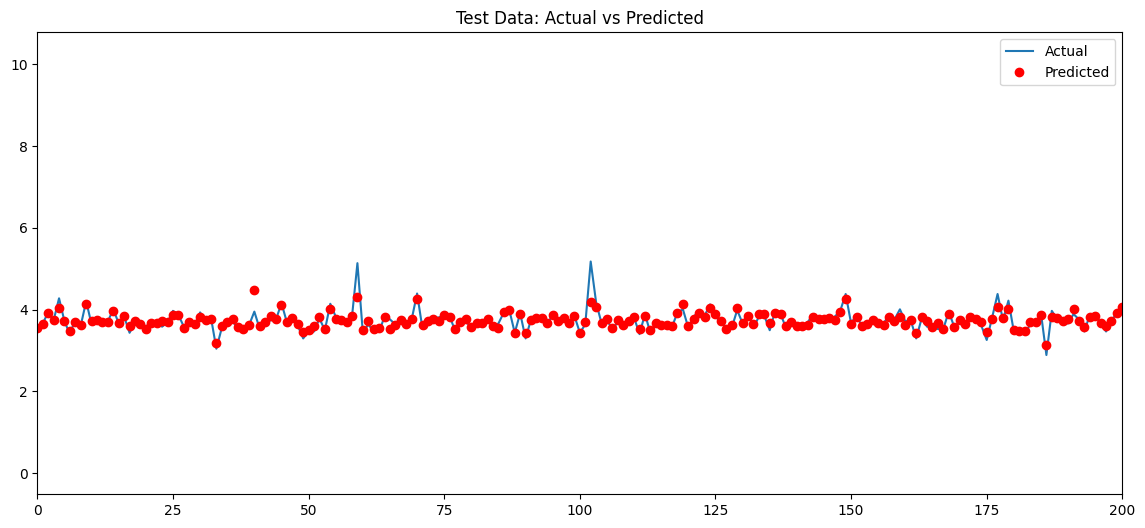

In [45]:


# more important, how about with validation set (test set)
y_test_prd = lin_reg.predict(X_test_scaled)


plot_prediction(y_test,y_test_prd,title='Test Data:')


(11869,)


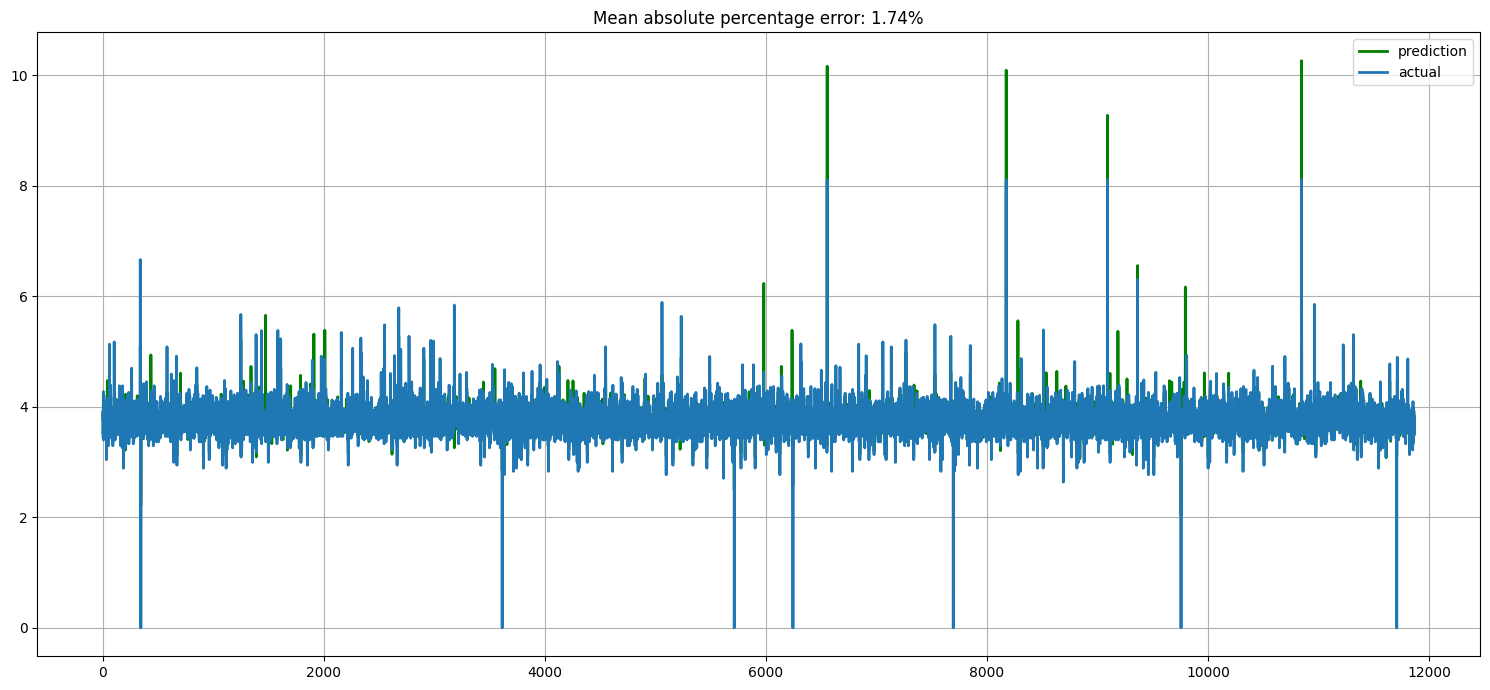

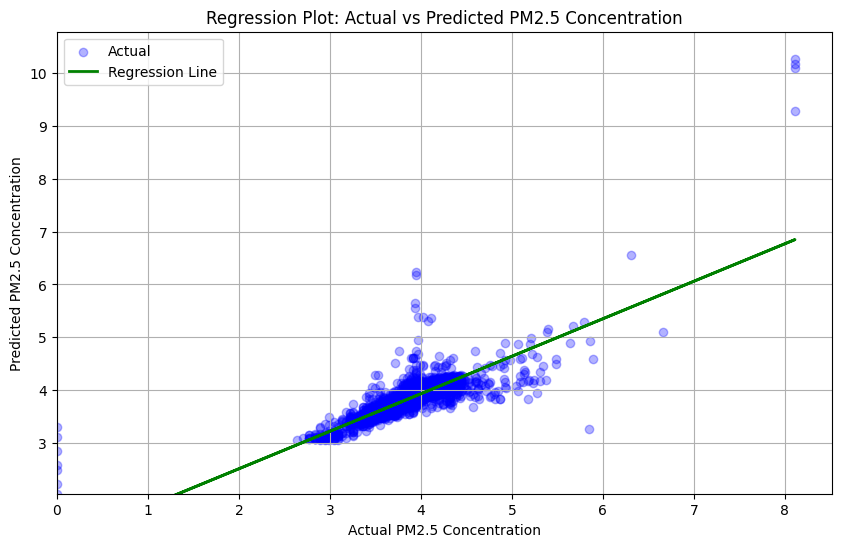

In [46]:
plotModelResults(lin_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
# plotCoefficients(lin_reg)
plotRegression(y_test, lin_reg.predict(X_test_scaled))

In [47]:
# for numeric data, one simple way to to see how far
# between the prediction and the garget
from sklearn.metrics import mean_squared_error

In [48]:
# on training set
lin_train_mae, lin_train_mse, lin_train_r2,lin_train_rmse = evaluate_model(y_train, y_train_prd)
print('Trainset:RMSE', lin_train_rmse,end="\n")
print('Trainset: MSE',lin_train_mse,end="\n")
print('Trainset: MAE',lin_train_mae,end="\n")
print('Trainset: R2',lin_train_r2,end="\n")

Trainset:RMSE 0.14251781062684715
Trainset: MSE 0.020311326345869865
Trainset: MAE 0.06704592285031429
Trainset: R2 0.737698843680685


In [49]:
# on test set
lin_test_mae, lin_test_mse, lin_test_r2, lin_test_rmse = evaluate_model(y_test, y_test_prd)
print('Testset:RMSE', lin_test_rmse,end="\n")
print('Testset: MSE',lin_test_mse,end="\n")
print('Testset: MAE',lin_test_mae,end="\n")
print('Testset: R2',lin_test_r2,end="\n")

Testset:RMSE 0.14053295493787854
Testset: MSE 0.019749511423571797
Testset: MAE 0.06589452257385604
Testset: R2 0.7190922049126416


In [50]:
# the average value label set (y set)
y=df['pm25_log']
y.mean()

3.763002929687003

In [51]:
# relative error
print(f'Relative Error: {100*np.sqrt(lin_test_mse)/y.mean():.0f}%')

Relative Error: 4%


In [52]:
results = dict()
def add_stats(model=None, train_rmse=None, test_rmse=None):
    global results
    results[model] = {'train_rmse': round(train_rmse,1),
                     'test_rmse': round(test_rmse, 1)}
    return None

In [53]:
add_stats(model='linear reg',
         train_rmse=np.sqrt(lin_train_mse),
         test_rmse=np.sqrt(lin_test_mse))


results

{'linear reg': {'train_rmse': 0.1, 'test_rmse': 0.1}}

# Xgboost model

In [54]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_reg.feature_importances_

array([0.71250486, 0.00369242, 0.00210467, 0.00211145, 0.00226   ,
       0.00289584, 0.10940366, 0.15575032, 0.00535813, 0.00391863],
      dtype=float32)

In [56]:
xgb_ytrain_d = xgb_reg.predict(X_train_scaled)

## evaluate model performance

In [57]:
xgb_ytrain_d = xgb_reg.predict(X_train_scaled)
# on training set
xgb_train_mae, xgb_train_mse, xgb_train_r2,xgb_train_rmse = evaluate_model(y_train, xgb_ytrain_d)
print('Trainset:RMSE', xgb_train_rmse,end="\n")
print('Trainset: MSE',xgb_train_mse,end="\n")
print('Trainset: MAE',xgb_train_mae,end="\n")
print('Trainset: R2',xgb_train_r2,end="\n")

Trainset:RMSE 0.023034313856849457
Trainset: MSE 0.0005305796148558469
Trainset: MAE 0.01759562249933459
Trainset: R2 0.9931480768844796


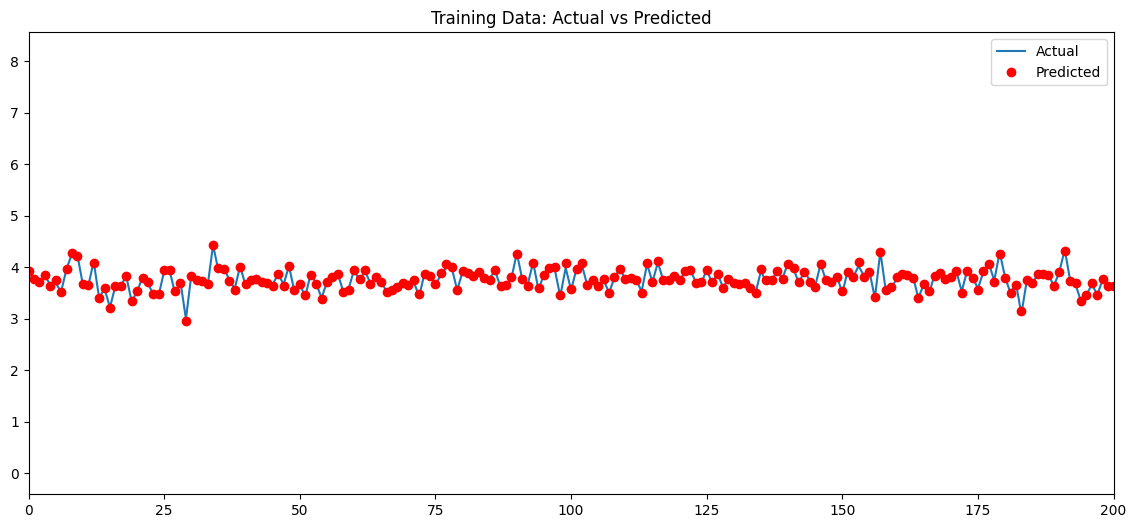

In [58]:
plot_prediction(y_train, xgb_ytrain_d,title='Training Data:')

In [59]:
xgb_ytest_d = xgb_reg.predict(X_test_scaled)

In [60]:
# on test set
xgb_test_mae, xgb_test_mse, xgb_test_r2,xgb_test_rmse = evaluate_model(y_test, xgb_ytest_d)
print('Testset:RMSE', xgb_test_rmse,end="\n")
print('Testset: MSE',xgb_test_mse,end="\n")
print('Testset: MAE',xgb_test_mae,end="\n")
print('Testset: R2',xgb_test_r2,end="\n")

Testset:RMSE 0.03386149579481597
Testset: MSE 0.0011466008974623395
Testset: MAE 0.02076008793867119
Testset: R2 0.9836912861769883


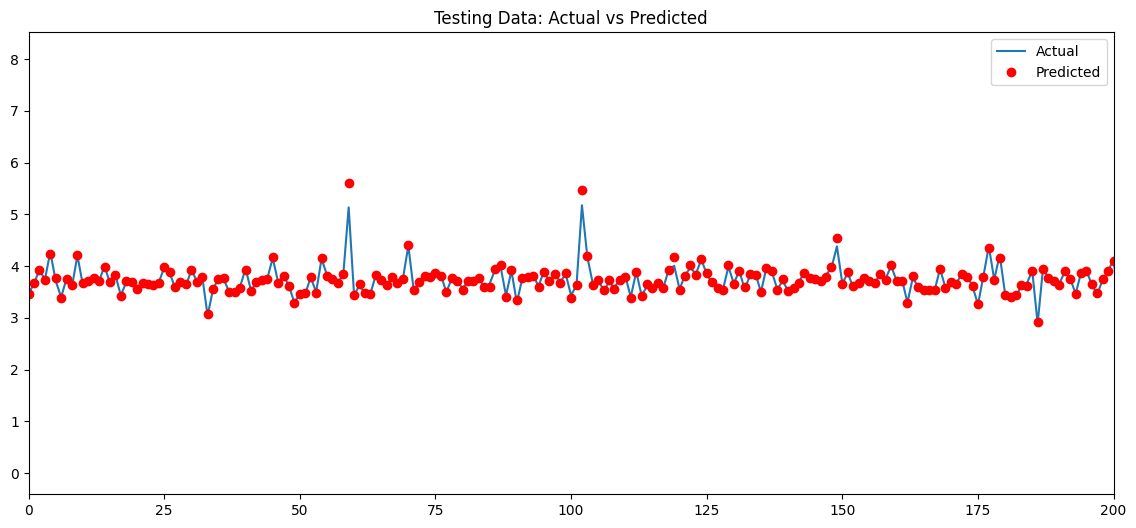

In [61]:
plot_prediction(y_test, xgb_ytest_d,title='Testing Data:')

In [62]:
# let bag the result
add_stats(model='xgb_reg',
         train_rmse=xgb_train_rmse,
         test_rmse=xgb_test_rmse)
results

{'linear reg': {'train_rmse': 0.1, 'test_rmse': 0.1},
 'xgb_reg': {'train_rmse': 0.0, 'test_rmse': 0.0}}

(11869,)


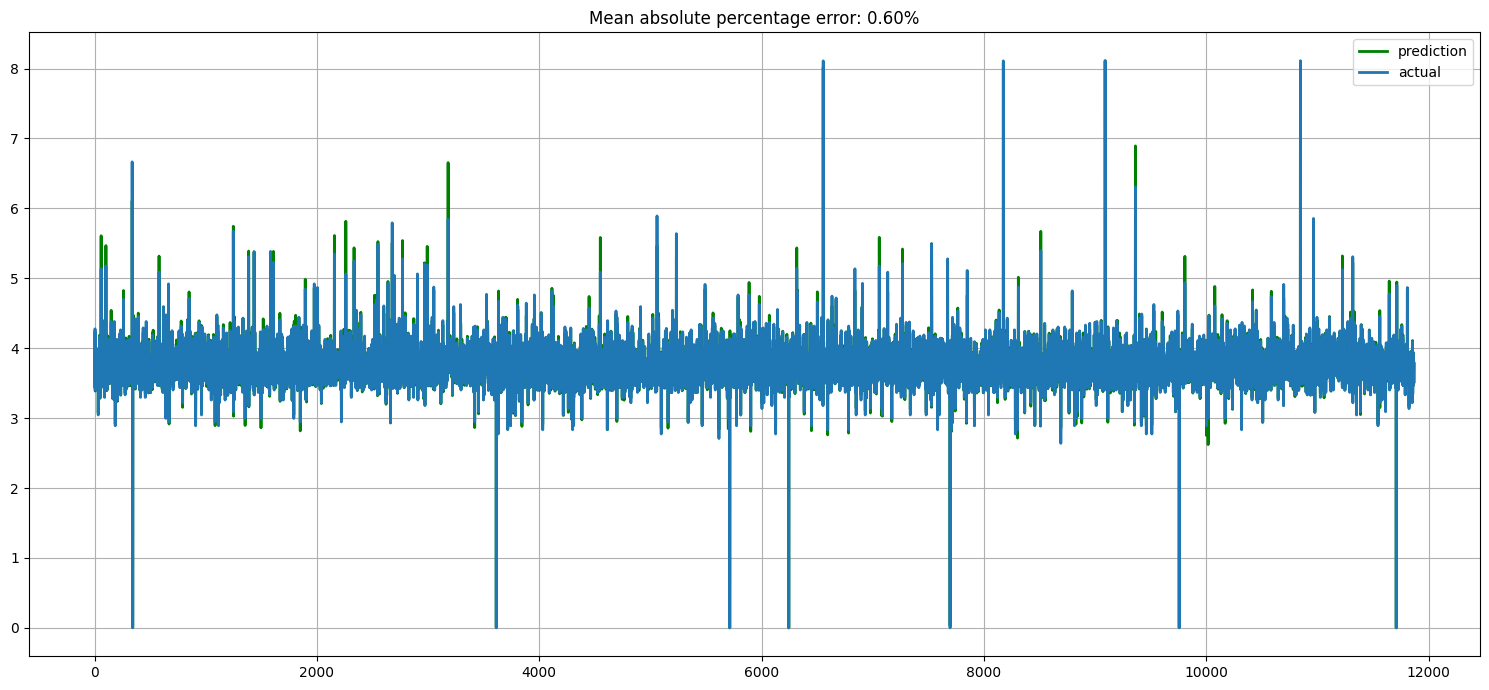

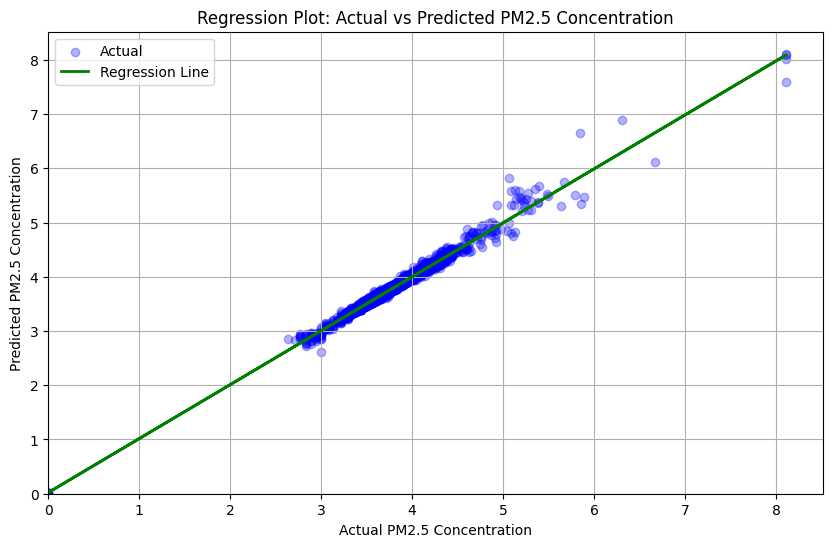

In [63]:
plotModelResults(xgb_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
#plotCoefficients(xgb_reg)
plotRegression(y_test, xgb_reg.predict(X_test_scaled))

# RandomForest

In [64]:
# more powerful model
from sklearn.ensemble import RandomForestRegressor

In [65]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [66]:
forest_reg.feature_importances_

array([9.83517761e-01, 1.41312321e-03, 1.08081056e-03, 7.16494943e-04,
       9.86025283e-04, 1.40357191e-03, 5.45465412e-03, 8.23921090e-04,
       1.27378335e-03, 3.32985462e-03])

## evaluate model performance

In [67]:
forest_ytrain_p = forest_reg.predict(X_train_scaled)

In [68]:
# on training set
rf_train_mae, rf_train_mse, rf_train_r2,rf_train_rmse = evaluate_model(y_train, forest_ytrain_p)
print('Trainset:RMSE', rf_train_rmse,end="\n")
print('Trainset: MSE',rf_train_mse,end="\n")
print('Trainset: MAE',rf_train_mae,end="\n")
print('Trainset: R2',rf_train_r2,end="\n")

Trainset:RMSE 0.010347462604320859
Trainset: MSE 0.00010706998234781862
Trainset: MAE 0.007461959503064279
Trainset: R2 0.9986172946217945


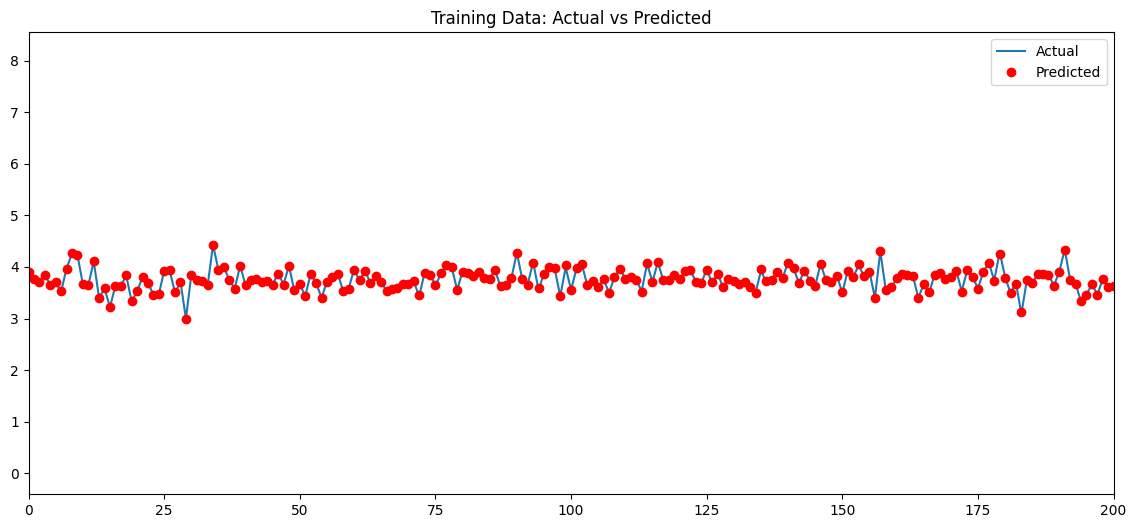

In [69]:
plot_prediction(y_train, forest_ytrain_p,title='Training Data:')

In [70]:
forest_ytest_p = forest_reg.predict(X_test_scaled)

In [71]:
# on test set
rf_test_mae, rf_test_mse, rf_test_r2,rf_test_rmse = evaluate_model(y_test, forest_ytest_p)
print('Testset:RMSE', rf_test_rmse,end="\n")
print('Testset: MSE',rf_test_mse,end="\n")
print('Testset: MAE',rf_test_mae,end="\n")
print('Testset: R2',rf_test_r2,end="\n")

Testset:RMSE 0.026999966900561684
Testset: MSE 0.0007289982126314266
Testset: MAE 0.01997749025629588
Testset: R2 0.9896310710609021


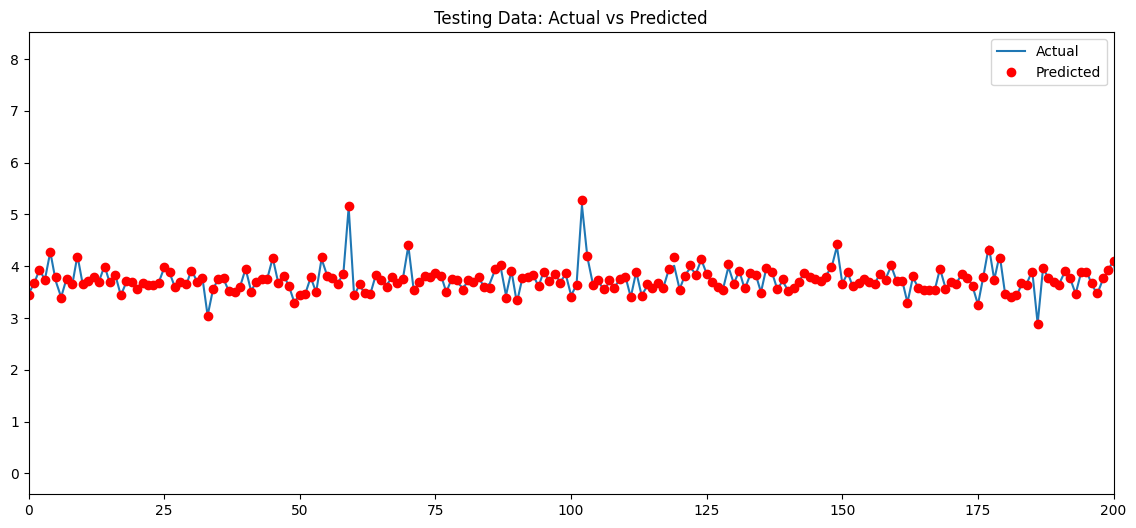

In [72]:
plot_prediction(y_test, forest_ytest_p,title='Testing Data:')

In [73]:
add_stats(model='randomforest reg',
         train_rmse=rf_train_mse,
         test_rmse=rf_test_mse)
results

{'linear reg': {'train_rmse': 0.1, 'test_rmse': 0.1},
 'xgb_reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'randomforest reg': {'train_rmse': 0.0, 'test_rmse': 0.0}}

(11869,)


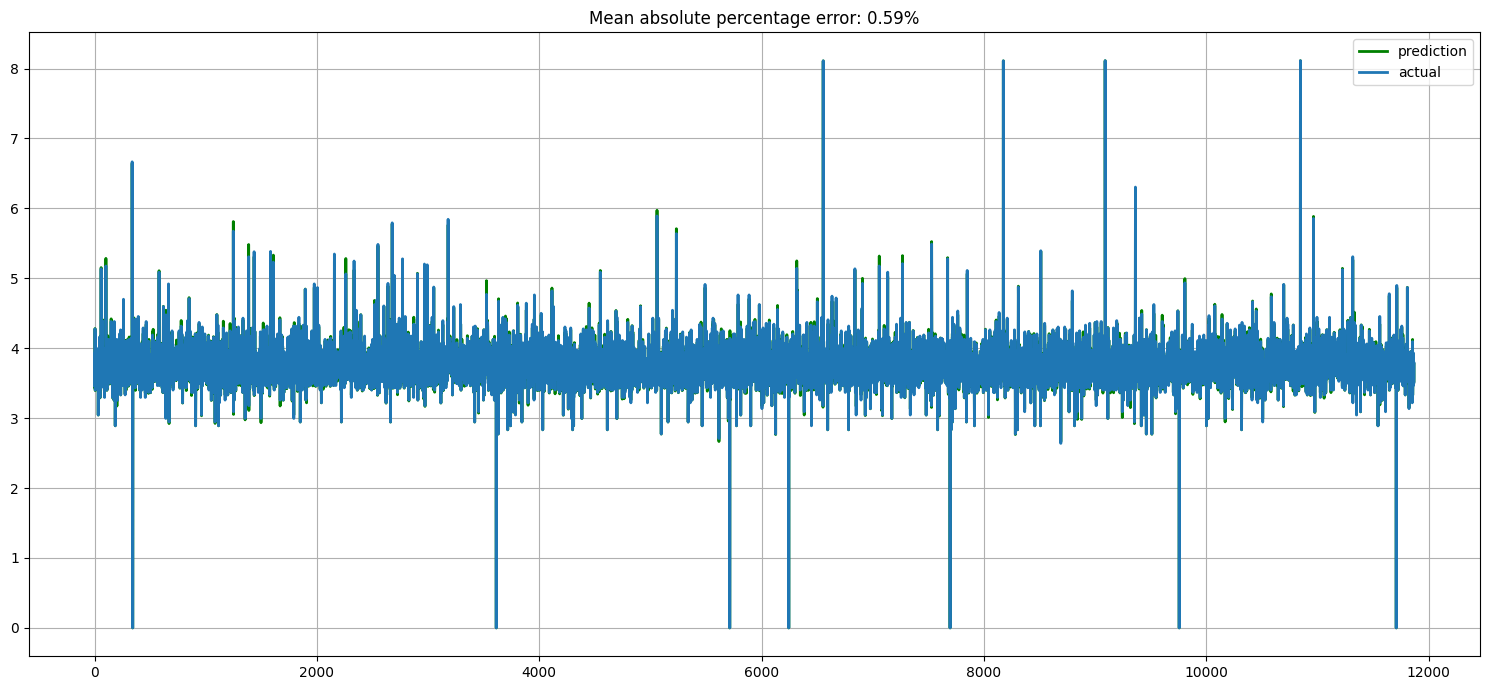

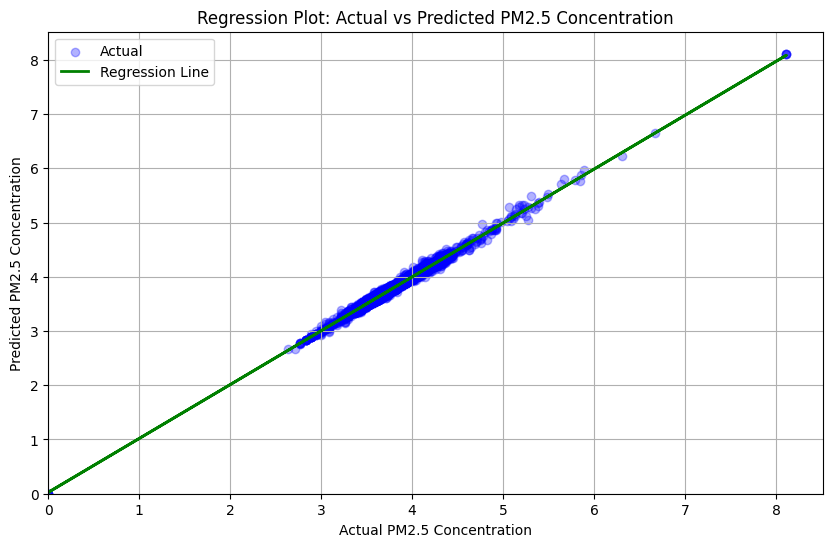

In [74]:
plotModelResults(forest_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
plotRegression(y_test, forest_reg.predict(X_test_scaled))

# Bagging regression Model

In [75]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor

In [76]:
bagging_reg = BaggingRegressor(n_estimators=100, random_state=42)

In [77]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(n_estimators=100, random_state=42)

## evaluate model performance

In [78]:
bagging_ytrain_p = bagging_reg.predict(X_train_scaled)

In [79]:
# on training set
bgg_train_mae, bgg_train_mse, bgg_train_r2,bgg_train_rmse = evaluate_model(y_train, bagging_ytrain_p)
print('Trainset:RMSE', bgg_train_rmse,end="\n")
print('Trainset: MSE',bgg_train_mse,end="\n")
print('Trainset: MAE',bgg_train_mae,end="\n")
print('Trainset: R2',bgg_train_r2,end="\n")

Trainset:RMSE 0.010388575948149254
Trainset: MSE 0.00010792251023046518
Trainset: MAE 0.007468016616984527
Trainset: R2 0.9986062850478452


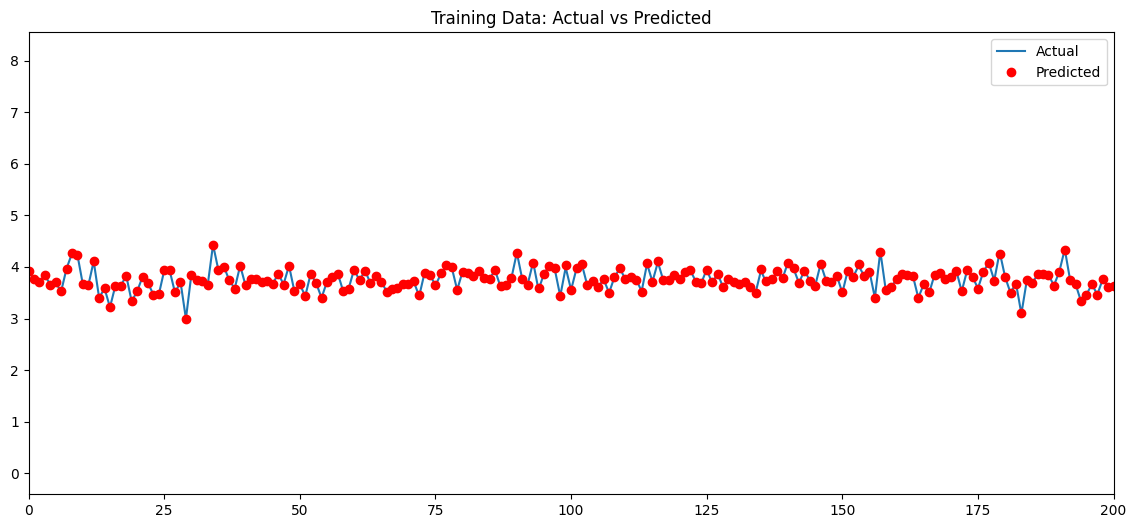

In [80]:
 plot_prediction(y_train, bagging_ytrain_p,title='Training Data:')

In [81]:
bagging_ytest_p = bagging_reg.predict(X_test_scaled)

In [82]:
# on test set
bgg_test_mae, bgg_test_mse, bgg_test_r2,bgg_test_rmse = evaluate_model(y_test, bagging_ytest_p)
print('Testset:RMSE', bgg_test_rmse,end="\n")
print('Testset: MSE',bgg_test_mse,end="\n")
print('Testset: MAE',bgg_test_mae,end="\n")
print('Testset: R2',bgg_test_r2,end="\n")

Testset:RMSE 0.027001765210863237
Testset: MSE 0.0007290953245025841
Testset: MAE 0.019995409804776536
Testset: R2 0.9896296897871572


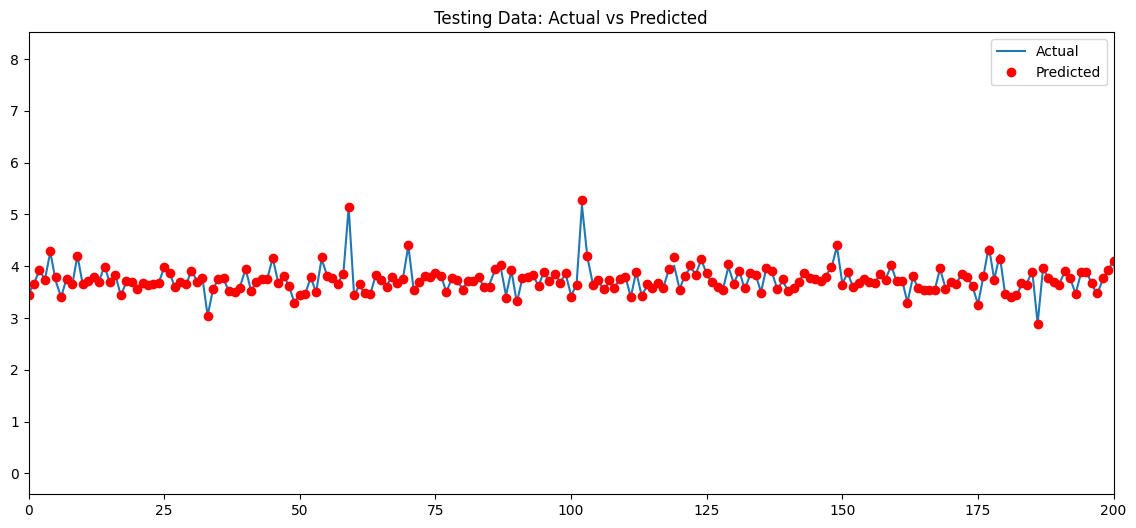

In [83]:
plot_prediction(y_test,bagging_ytest_p,title='Testing Data:')

In [84]:
add_stats(model='Bagging reg',
         train_rmse=bgg_train_rmse,
         test_rmse=bgg_test_rmse)
results

{'linear reg': {'train_rmse': 0.1, 'test_rmse': 0.1},
 'xgb_reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'randomforest reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'Bagging reg': {'train_rmse': 0.0, 'test_rmse': 0.0}}

(11869,)


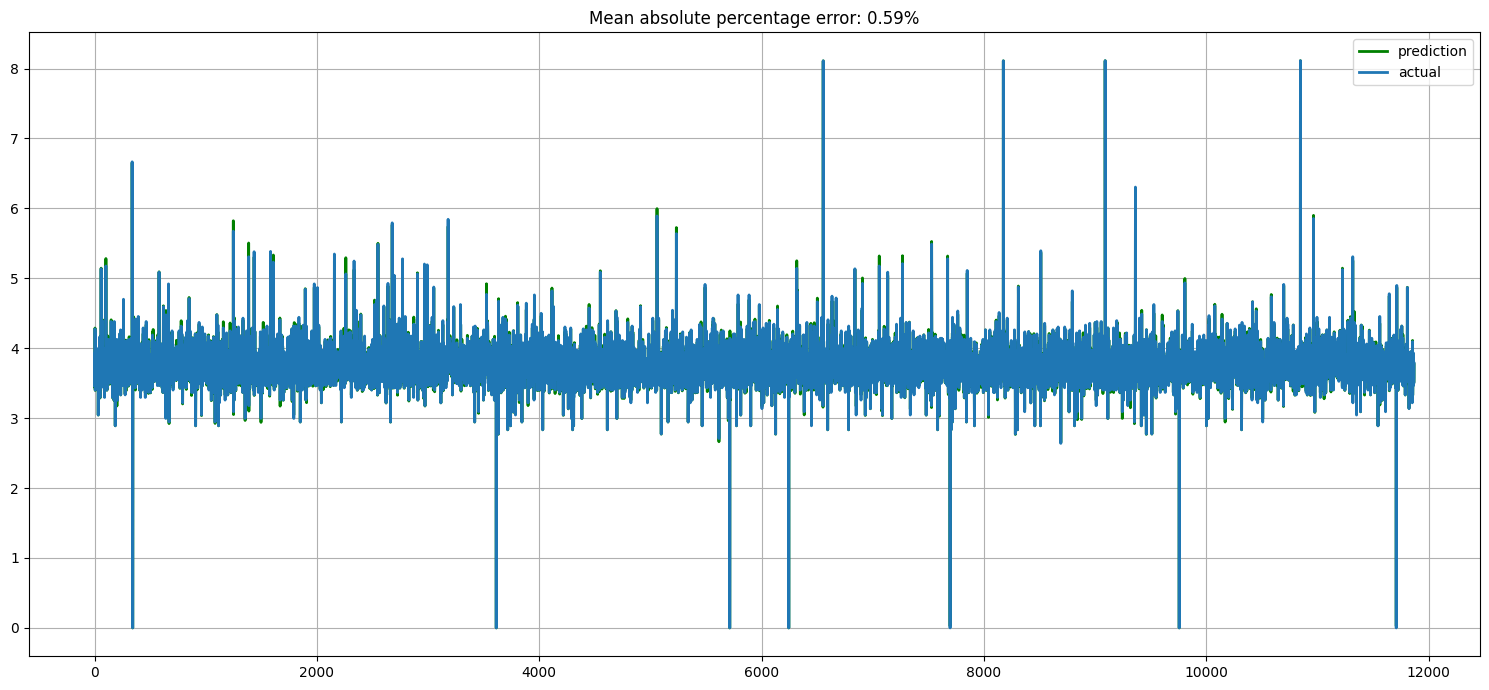

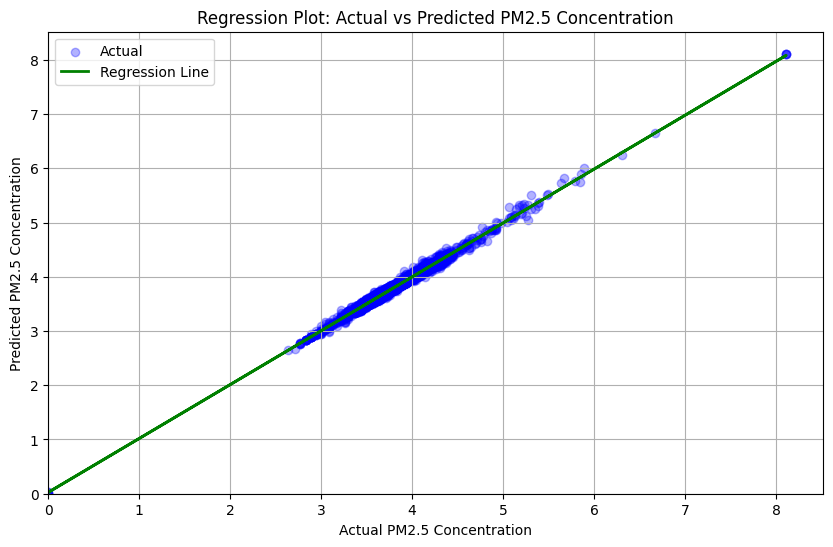

In [85]:
plotModelResults(bagging_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
plotRegression(y_test, bagging_reg.predict(X_test_scaled))

# Cross validation

In [86]:
from sklearn.model_selection import cross_val_score

In [ ]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

**Models validation on Training data**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(models, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error'):
    results = {
        'Model': [],
        'Scores': [],
        'Mean': [],
        'Standard Deviation': []
    }

    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        results['Model'].append(name)
        results['Scores'].append(scores)
        results['Mean'].append(mean_score)
        results['Standard Deviation'].append(std_score)

        print(f"{name}:")
        print(f"Scores:  {scores}")
        print(f"Mean:  {mean_score}")
        print(f"Standard Deviation:  {std_score}")
        print("-" * 40)

    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
models = {
    'Linear Regression': lin_reg,
    'XGBoost Regressor': xgb_reg,
    'Random Forest Regressor': forest_reg,
    'Bagging Regressor': bagging_reg
}

results_df1 = evaluate_models(models, X_train_scaled, y_train)



In [ ]:
results_df1.drop(columns='Scores').style.background_gradient(cmap="summer")

,Model,Mean,Standard Deviation
0,Linear Regression,-0.020552,0.003569
1,XGBoost Regressor,-0.001721,0.000480
2,Random Forest Regressor,-0.000779,0.000044
3,Bagging Regressor,-0.000785,0.000044


**models validation on test data**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(models, X_test_scaled, y_test, cv=10, scoring='neg_mean_squared_error'):
    results = {
        'Model': [],
        'Scores': [],
        'Mean': [],
        'Standard Deviation': []
    }

    for name, model in models.items():
        scores = cross_val_score(model, X_test_scaled, y_test, scoring=scoring, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        results['Model'].append(name)
        results['Scores'].append(scores)
        results['Mean'].append(mean_score)
        results['Standard Deviation'].append(std_score)

        print(f"{name}:")
        print(f"Scores:  {scores}")
        print(f"Mean:  {mean_score}")
        print(f"Standard Deviation:  {std_score}")
        print("-" * 40)

    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
models = {
    'Linear Regression': lin_reg,
    'XGBoost Regressor': xgb_reg,
    'Random Forest Regressor': forest_reg,
    'Bagging Regressor': bagging_reg
}

results_df2 = evaluate_models(models, X_test_scaled, y_test)



Linear Regression:
Scores:  [-0.0173635  -0.02356723 -0.0205429  -0.01688651 -0.0163766  -0.02804549
 -0.02426138 -0.01265666 -0.01707083 -0.0219273 ]
Mean:  -0.01986984148580132
Standard Deviation:  0.004378731929862236
----------------------------------------
XGBoost Regressor:
Scores:  [-0.00092423 -0.00090483 -0.00090443 -0.00069987 -0.00078604 -0.00075929
 -0.00074282 -0.00671023 -0.00079732 -0.00073534]
Mean:  -0.0013964405359811276
Standard Deviation:  0.0017728541048600784
----------------------------------------
Random Forest Regressor:
Scores:  [-0.0010079  -0.00090963 -0.00101974 -0.0006978  -0.00077046 -0.0007288
 -0.00110956 -0.00118875 -0.00075497 -0.0010098 ]
Mean:  -0.0009197399728089556
Standard Deviation:  0.00016417434856519944
----------------------------------------
Bagging Regressor:
Scores:  [-0.00097133 -0.00090991 -0.00092804 -0.0007072  -0.00078073 -0.00072561
 -0.00092121 -0.00112766 -0.00074571 -0.00097156]
Mean:  -0.000878896276680473
Standard Deviation:  0

In [ ]:
results_df2.drop(columns='Scores').style.background_gradient(cmap="summer")

,Model,Mean,Standard Deviation
0,Linear Regression,-0.019870,0.004379
1,XGBoost Regressor,-0.001396,0.001773
2,Random Forest Regressor,-0.000920,0.000164
3,Bagging Regressor,-0.000879,0.000128


>**Conclusion**- Base on cross validation of all the models,it looks like the Random Forest Regressor  performs better than the others

# Ensemble Methods

In [87]:
# let look at a final approach to combine three regression we have so far using Voting method
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
# and make each model as an parameter for then ensemble (voting)

# lin_reg=LinearRegression()

rnd_reg=RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

bag_reg=BaggingRegressor(n_estimators=200, random_state=42)

xgb_reg= XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.2, random_state=42)


In [90]:
# and make each model as an parameter for then ensemble (voting)
voting_reg = VotingRegressor(
    estimators=[('rnd', rnd_reg),
               ('bag', bag_reg),
                ('xgb',xgb_reg),
               ],
)

In [91]:
# train model by the train set
voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rnd',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('bag',
                             BaggingRegressor(n_estimators=200,
                                              random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categoric...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [92]:
# check estimator (paramters)
voting_reg.estimators_

[RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42),
 BaggingRegressor(n_estimators=200, random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)]

In [93]:
# now we do predicting on the test set
y_entest_p = voting_reg.predict(X_test_scaled)

## Evaluate Model

In [94]:
# we could run on train set
y_entrain_p = voting_reg.predict(X_train_scaled)
mse = mean_squared_error(y_entrain_p, y_train)
en_train = np.sqrt(mse)

In [95]:
# on test set
vm_train_mae, vm_train_mse, vm_train_r2,vm_train_rmse = evaluate_model(y_train, y_entrain_p)
print('Trainset:RMSE', vm_train_rmse,end="\n")
print('Trainset: MSE',vm_train_mse,end="\n")
print('Trainset: MAE',vm_train_mae,end="\n")
print('Trainset: R2',vm_train_r2,end="\n")

Trainset:RMSE 0.014005439926117075
Trainset: MSE 0.00019615234752407427
Trainset: MAE 0.010765456772063345
Trainset: R2 0.9974668819409337


In [96]:
X_train.columns

Index(['pm10', 'temp', 'hum', 'press', 'wspd', 'wdir', 'rain', 'hour',
       'minutes', 'pm25_rolling_mean'],
      dtype='object')

In [97]:
mse = mean_squared_error(y_entest_p, y_test)
en_test = np.sqrt(mse)

In [98]:
# on test set
vm_test_mae, vm_test_mse, vm_test_r2,vm_test_rmse = evaluate_model(y_test, y_entest_p)
print('Testset:RMSE', vm_test_rmse,end="\n")
print('Testset: MSE',vm_test_mse,end="\n")
print('Testset: MAE',vm_test_mae,end="\n")
print('Testset: R2',vm_test_r2,end="\n")

Testset:RMSE 0.026682712666939674
Testset: MSE 0.0007119671552664629
Testset: MAE 0.019581320811787862
Testset: R2 0.9898733128394348


In [99]:
# still in 21 for test set
add_stats(model='voting reg',
         train_rmse=en_train,
         test_rmse=en_test)
results

{'linear reg': {'train_rmse': 0.1, 'test_rmse': 0.1},
 'xgb_reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'randomforest reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'Bagging reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'voting reg': {'train_rmse': 0.0, 'test_rmse': 0.0}}

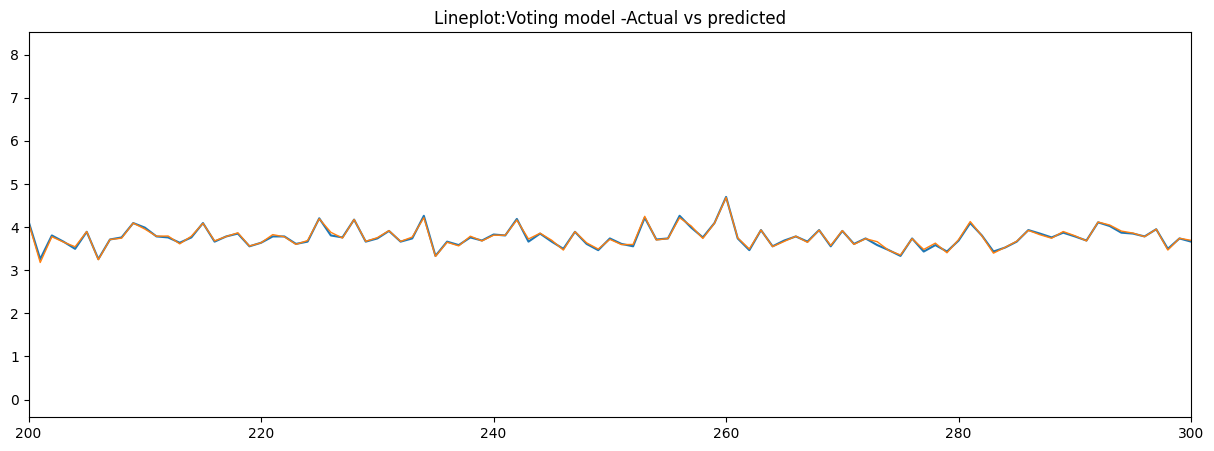

In [100]:
# let visualize the data from Ensemble with test set
plt.figure(figsize=(15,5))
plt.plot(y_test.to_list(),label='Actual')
plt.plot(y_entest_p, lw=1,label='prediction')
plt.xlim(200,300)
plt.title("Lineplot:Voting model -Actual vs predicted")
plt.show()

In [101]:

from random import randint

# time to invest some good graphs
def plot_results(label=None, prediction=None, std_=None, points=100, savefig=False):

    plt.style.use('default')
    plt.rcParams['font.size'] = 12
    start = randint(0, len(label)-points)
    end = start + points
    label_ = label.iloc[start:end]
    pred_ = prediction[start:end]
    xindex = np.arange(0,len(label_),1)

    plt.figure(figsize=(10,6))
    plt.plot(label_.to_list(), 'ko--',lw=0.5, label='measured')
    plt.plot(pred_, lw=1, color='#922B21', label='predicted')
    plt.fill_between(xindex, pred_- std_, pred_+std_,
                    color='#5499C7', alpha=0.6, label = '$\pm1 \sigma$')

    max_ = np.max([label_.max(), np.max(pred_)])
    plt.ylim(0, 1.1*max_)
    plt.ylabel('Concentration, $\mu g/m^3$')
    plt.title('Measured and predicted $PM_{2.5}$ using Ensemble regression',
              y=1.05, weight='bold')
    plt.xlabel('Hour, site: Malaysia, 2024')
    plt.legend(ncol=3)
    if savefig:
        plt.tight_layout()
        plt.savefig(f'img/en_reg_{start}.png',)
    return None

In [102]:
mse = mean_squared_error(y_entrain_p, y_train)
train_std = np.sqrt(mse)
mse, train_std

(0.00019615234752407427, 0.014005439926117075)

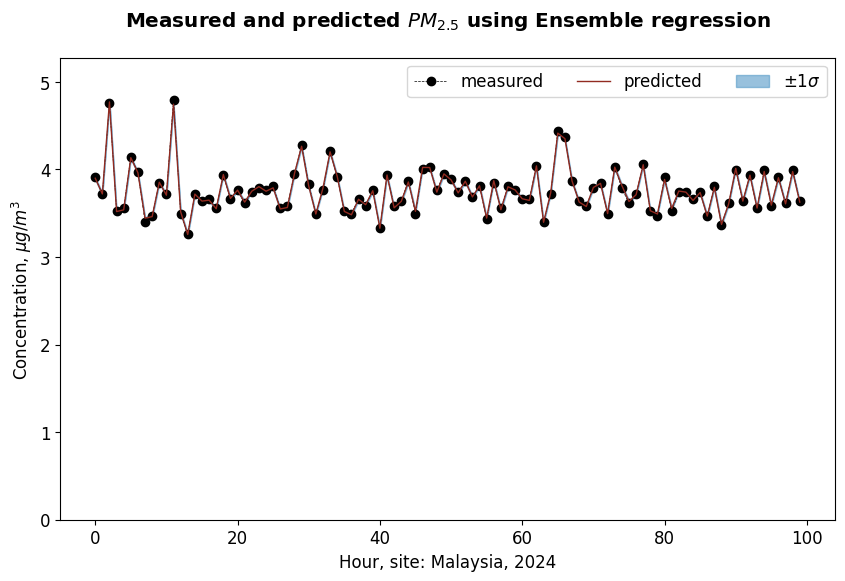

In [103]:
plot_results(label=y_train, prediction=y_entrain_p,
             std_=train_std, savefig=False)

### Testset

In [104]:
y_entest_p = voting_reg.predict(X_test_scaled)

In [105]:
mse = mean_squared_error(y_entest_p, y_test)
test_std = np.sqrt(mse)
mse, test_std

(0.0007119671552664629, 0.026682712666939674)

In [106]:
add_stats(model='voting reg (Ensembs)',
         train_rmse=train_std,
         test_rmse=test_std)
results

{'linear reg': {'train_rmse': 0.1, 'test_rmse': 0.1},
 'xgb_reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'randomforest reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'Bagging reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'voting reg': {'train_rmse': 0.0, 'test_rmse': 0.0},
 'voting reg (Ensembs)': {'train_rmse': 0.0, 'test_rmse': 0.0}}

- not much worse, in fact, with less parameters and get a similar outcome, that is actually encouraging

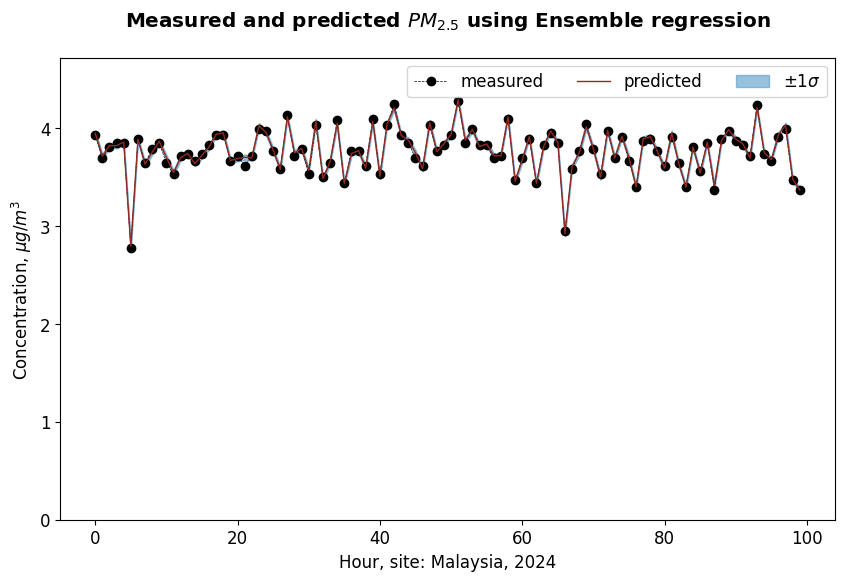

In [107]:
plot_results(label=y_test,
             prediction=y_entest_p, std_=test_std, savefig=False)

In [108]:
feature_names=list(X_train.columns)

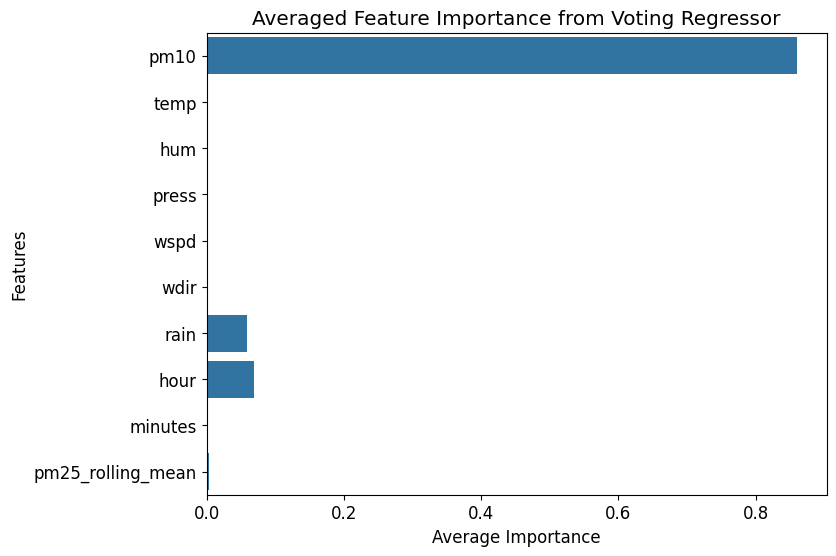

In [109]:
#  Extract feature importances from models that have the 'feature_importances_' attribute
importances = []
for name, est in voting_reg.named_estimators_.items():
    if hasattr(est, 'feature_importances_'):
        importances.append(est.feature_importances_)

# Compute the average feature importance across all models
average_importance = np.mean(importances, axis=0)

# Visualize the averaged feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=average_importance, y=feature_names)
plt.title('Averaged Feature Importance from Voting Regressor')
plt.xlabel('Average Importance')
plt.ylabel('Features')
plt.show()


# Model Evaluation And Result


> RMSE:this is Root Mean Squared Error. If we assumed the errors is random, then the distribution of error to the mean value should be in standard distribution (Gaussian Distribution). Then the RMSE is the Standard Deviation (SD). The ratio of SD to the mean value in percent is called Relative Standard Deviation.

In [110]:
df = pd.DataFrame(data=results)

In [111]:
df

,linear reg,xgb_reg,randomforest reg,Bagging reg,voting reg,voting reg (Ensembs)
train_rmse,0.1,0.0,0.0,0.0,0.0,0.0
test_rmse,0.1,0.0,0.0,0.0,0.0,0.0


In [112]:
df2 = df.transpose()

In [113]:
df2

,train_rmse,test_rmse
linear reg,0.1,0.1
xgb_reg,0.0,0.0
randomforest reg,0.0,0.0
Bagging reg,0.0,0.0
voting reg,0.0,0.0
voting reg (Ensembs),0.0,0.0


In [114]:
sns.set_style('whitegrid')

In [115]:
import pandas as pd

# Define the data as a list of dictionaries
data = [
    {'Model': 'Linear Regression', 'Set': 'Training', 'RMSE':lin_train_rmse, 'MSE': lin_train_mse, 'MAE': lin_train_mae, 'R²': lin_train_r2},
    {'Model': 'Linear Regression', 'Set': 'Test', 'RMSE': lin_test_rmse, 'MSE': lin_test_mse, 'MAE':lin_train_mae, 'R²': lin_test_r2},
    {'Model': 'XGBoost', 'Set': 'Training', 'RMSE': xgb_train_rmse, 'MSE':xgb_train_mse, 'MAE':xgb_train_mae, 'R²': xgb_train_r2},
    {'Model': 'XGBoost', 'Set': 'Test', 'RMSE': xgb_test_rmse, 'MSE': xgb_test_mse, 'MAE': xgb_test_mae, 'R²': xgb_test_r2},
    {'Model': 'Random Forest', 'Set': 'Training', 'RMSE': rf_train_rmse, 'MSE': rf_train_mse, 'MAE': rf_train_mae, 'R²': rf_train_r2},
    {'Model': 'Random Forest', 'Set': 'Test', 'RMSE': rf_test_rmse, 'MSE': rf_test_mse, 'MAE': rf_test_mae, 'R²': rf_test_r2},
    {'Model': 'Bagging Regressor', 'Set': 'Training', 'RMSE': bgg_train_rmse, 'MSE': bgg_train_mse, 'MAE': bgg_train_mae, 'R²': bgg_train_r2},
    {'Model': 'Bagging Regressor', 'Set': 'Test', 'RMSE': bgg_test_mae, 'MSE': bgg_test_mse, 'MAE': bgg_test_mae, 'R²': bgg_test_r2},
    {'Model': 'Voting', 'Set': 'Training', 'RMSE': vm_train_rmse, 'MSE': vm_train_mse, 'MAE': vm_train_mae,'R²': vm_train_r2},
    {'Model': 'Voting', 'Set': 'Test', 'RMSE': vm_test_rmse, 'MSE': vm_test_mse, 'MAE': vm_test_mae, 'R²': vm_test_r2}
]

# Create the DataFrame
report= pd.DataFrame(data)

# Display the DataFrame
# print(df.style.background_gradient(cmap="summer"))


In [116]:
# # Function to create bar plots
# def plot_metric(train_values, test_values, metric_name, ylabel, title):
#     bw = 0.3
#     idx = np.arange(len(models))
#     fig, ax = plt.subplots(figsize=(8, 6))
#     ax.bar(idx-bw/2, train_values, bw, color='gray', label='Train Set')
#     ax.bar(idx+bw/2, test_values, bw, color='navy', alpha=0.8, label='Test Set')
#     ax.set_xticks(idx)
#     ax.set_xticklabels(models, rotation=25)
#     ax.set_xlabel('Regression Models')
#     ax.set_title(f'{metric_name} using $PM_{{2.5}}$ prediction with $PM_{{10}}$ and meteorological parameters', y=1.05, weight='bold')
#     ax.set_ylabel(ylabel)
#     ax.legend(frameon=True, ncol=2)
#     fig.tight_layout()
#     plt.show()






def plot_metric(train_values, test_values, metric_name, ylabel, title):
    models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Bagging Regressor', 'Voting']
    bw = 0.35  # Bar width
    idx = np.arange(len(models))  # The label locations

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(idx - bw/2, train_values, bw, color='gray', label='Train Set')
    bars2 = ax.bar(idx + bw/2, test_values, bw, color='navy', alpha=0.8, label='Test Set')

    ax.set_xlabel('Models')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(idx)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()



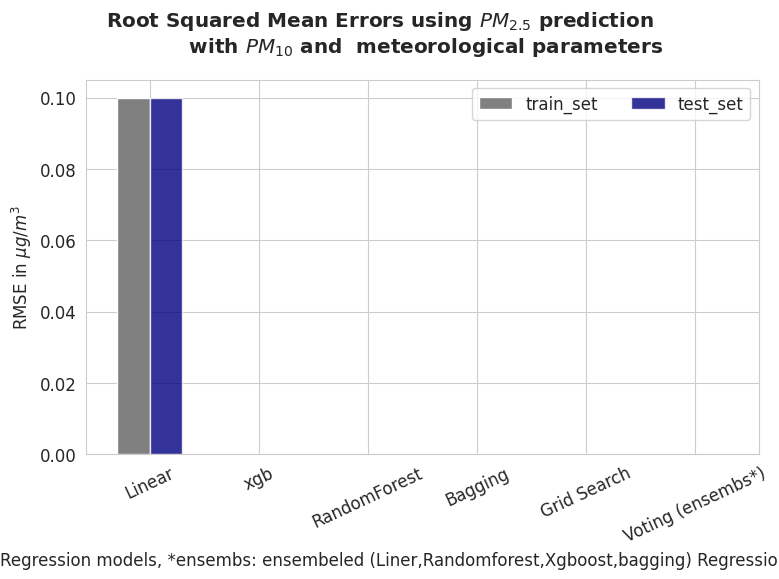

In [117]:
bw = 0.3
idx = np.arange(len(df2))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(idx-bw/2, df2['train_rmse'], bw, color='gray', label='train_set')
ax.bar(idx+bw/2, df2['test_rmse'], bw, color='navy', alpha=0.8, label='test_set')
ax.set_xticklabels(['','Linear', 'xgb', 'RandomForest','Bagging',
                    'Grid Search', 'Voting (ensembs*)'],
                  rotation=25)
ax.set_xlabel('Regression models, *ensembs: ensembeled (Liner,Randomforest,Xgboost,bagging) Regression model')
ax.set_title('Root Squared Mean Errors using $PM_{2.5}$ prediction\
             \n with $PM_{10}$ and  meteorological parameters',
            y=1.05,
            weight='bold')
# labels = ax.get_xticklabels()
ax.set_ylabel('RMSE in $\mu g/m^3$')
ax.legend(frameon=True, ncol=2)
fig.tight_layout()


In [118]:
res_data=pd.DataFrame(data)

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is in the format provided
models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Bagging Regressor', 'Gridsearch', 'Voting']


train_rmse = res_data[res_data['Set'] == 'Training']['RMSE'].tolist()
test_rmse = res_data[res_data['Set'] == 'Test']['RMSE'].tolist()
train_r2 = res_data[res_data['Set'] == 'Training']['R²'].tolist()
test_r2 = res_data[res_data['Set'] == 'Test']['R²'].tolist()




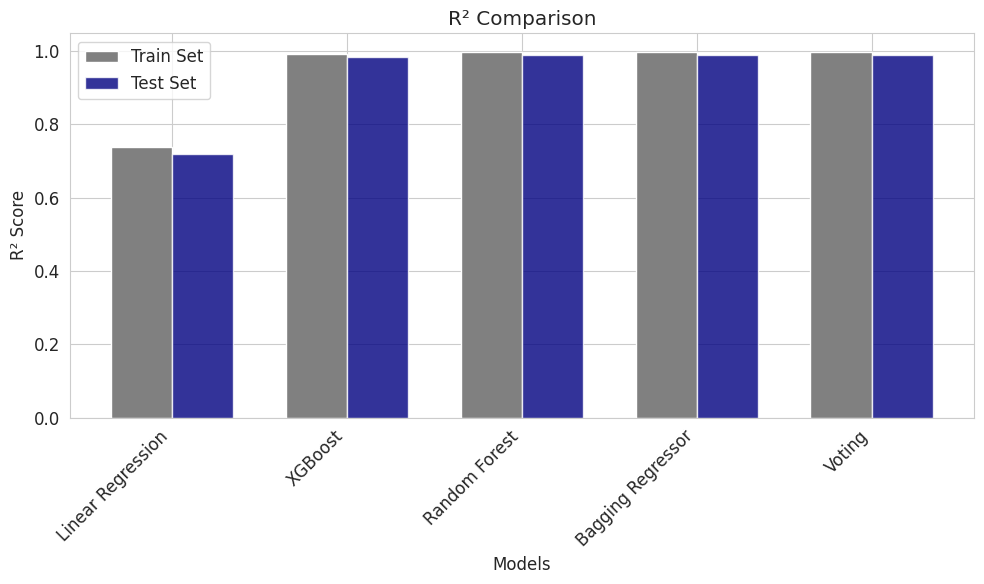

In [120]:
plot_metric(train_r2, test_r2, 'R² Score', 'R² Score', 'R² Comparison')

In [121]:
# res_data
display(res_data.style.background_gradient(cmap="summer"))

,Model,Set,RMSE,MSE,MAE,R²
0,Linear Regression,Training,0.142518,0.020311,0.067046,0.737699
1,Linear Regression,Test,0.140533,0.019750,0.067046,0.719092
2,XGBoost,Training,0.023034,0.000531,0.017596,0.993148
3,XGBoost,Test,0.033861,0.001147,0.020760,0.983691
4,Random Forest,Training,0.010347,0.000107,0.007462,0.998617
5,Random Forest,Test,0.027000,0.000729,0.019977,0.989631
6,Bagging Regressor,Training,0.010389,0.000108,0.007468,0.998606
7,Bagging Regressor,Test,0.019995,0.000729,0.019995,0.989630
8,Voting,Training,0.014005,0.000196,0.010765,0.997467
9,Voting,Test,0.026683,0.000712,0.019581,0.989873


In [122]:


# Create DataFrame
rest = {
    "Model": ["Liner","XGBoost", "Random Forest", "Bagging Regressor","Voting"],
    "MAE": [lin_test_mae,xgb_test_mae, rf_test_mae, bgg_test_mae, vm_test_mae],
    "MSE": [lin_test_mse,xgb_test_mse, rf_test_mse, bgg_test_mse,  vm_test_mse],
    "RMSE": [lin_test_rmse,xgb_test_rmse, rf_test_rmse, bgg_test_rmse,  vm_test_rmse],
    "R-squared": [lin_test_r2,xgb_test_r2, rf_test_r2, bgg_test_r2,  vm_test_r2],
}

res = pd.DataFrame(rest)
display(res.style.background_gradient(cmap="summer"))


,Model,MAE,MSE,RMSE,R-squared
0,Liner,0.065895,0.019750,0.140533,0.719092
1,XGBoost,0.020760,0.001147,0.033861,0.983691
2,Random Forest,0.019977,0.000729,0.027000,0.989631
3,Bagging Regressor,0.019995,0.000729,0.027002,0.989630
4,Voting,0.019581,0.000712,0.026683,0.989873


>Conclusion: It can be seen that the voting is the  best model in the prediction

## Model Inference

In [184]:
def predict_single_data_point(model, data_point,X_train, recent_data=None):
    """
    Predict PM2.5 for a single data point, handling missing pm25_rolling_mean.

    Parameters:
    - model: trained model
    - data_point: new data point for prediction (dictionary or pandas series)
    - recent_data: optional, recent data points to calculate rolling mean (DataFrame)
    """
    if isinstance(data_point, dict):
        data_point = pd.Series(data_point)

    dp=data_point.values
    pm25_rolling_mean=X_train['pm25_rolling_mean'].mean()
    # Combine the data point with the pm25_rolling_mean value
    data_point_with_rolling_mean = np.append(dp, pm25_rolling_mean)
    scaler=StandardScaler()
    x_scaled=scaler.fit(X_train)
    scaled_data=scaler.fit_transform(data_point_with_rolling_mean.reshape(1,-1))
    # Make prediction
    prediction_log = model.predict(scaled_data)
    prediction_pm25 = np.expm1(prediction_log)  # Convert from log scale to original scale
    return prediction_pm25[0]

In [191]:
X_test.iloc[-25].drop('pm25_rolling_mean')

,2024-10-02 13:01:11
pm10,48.000
temp,34.700
hum,45.000
press,1.012
wspd,0.500
wdir,40.000
rain,17.400
hour,13.000
minutes,1.000


In [192]:
y_test.iloc[-5]

3.784189633918261

In [193]:
np.expm1(y_test.iloc[-5])

42.99999999999999

In [194]:
 model=joblib.load('/content/drive/MyDrive/2024/DUST-MODEL/Dust_predict_app/models/Voting_model.pkl')

In [204]:
data_point=X_test.iloc[-25].drop('pm25_rolling_mean')

dp=data_point.values

In [205]:
pm25_rolling_mean=X_train['pm25_rolling_mean'].mean()

In [206]:
# Combine the data point with the pm25_rolling_mean value
data_point_with_rolling_mean = np.append(dp, pm25_rolling_mean)


In [207]:
scaler = StandardScaler()

In [208]:
scaler.fit(X_train)

StandardScaler()

In [213]:
scaled_data=scaler.fit_transform(data_point_with_rolling_mean.reshape(1,-1))

In [214]:
y_pred_log=model.predict(scaled_data)

In [215]:
y_pred=np.expm1(y_pred_log)
y_pred

array([44.3479993])

In [216]:
predict_single_data_point(model, data_point,X_train,)

44.34799929641051

## save model

In [ ]:
import joblib

In [ ]:
import os
try:
    os.makedirs('models')
except FileExistsError:
    pass

In [ ]:
modelpath='/content/drive/MyDrive/Dustpredict/Dust-predict/models/voting_reg.pkl'

In [ ]:

modelpath='/content/drive/MyDrive/Dustpredict/Dust-predict/models/voting_reg.pkl'

def save_model(model,modelpath):
    joblib.dump(model, modelpath )
    print(f"Model saved successfully in {modelpath}")

In [ ]:
save_model(voting_reg,modelpath)

Model saved successfully in /content/drive/MyDrive/2024/Dustpredict/Dust-predict/models/voting_reg.pkl
